<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/Ingenieria_de_caracteristicas_formato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

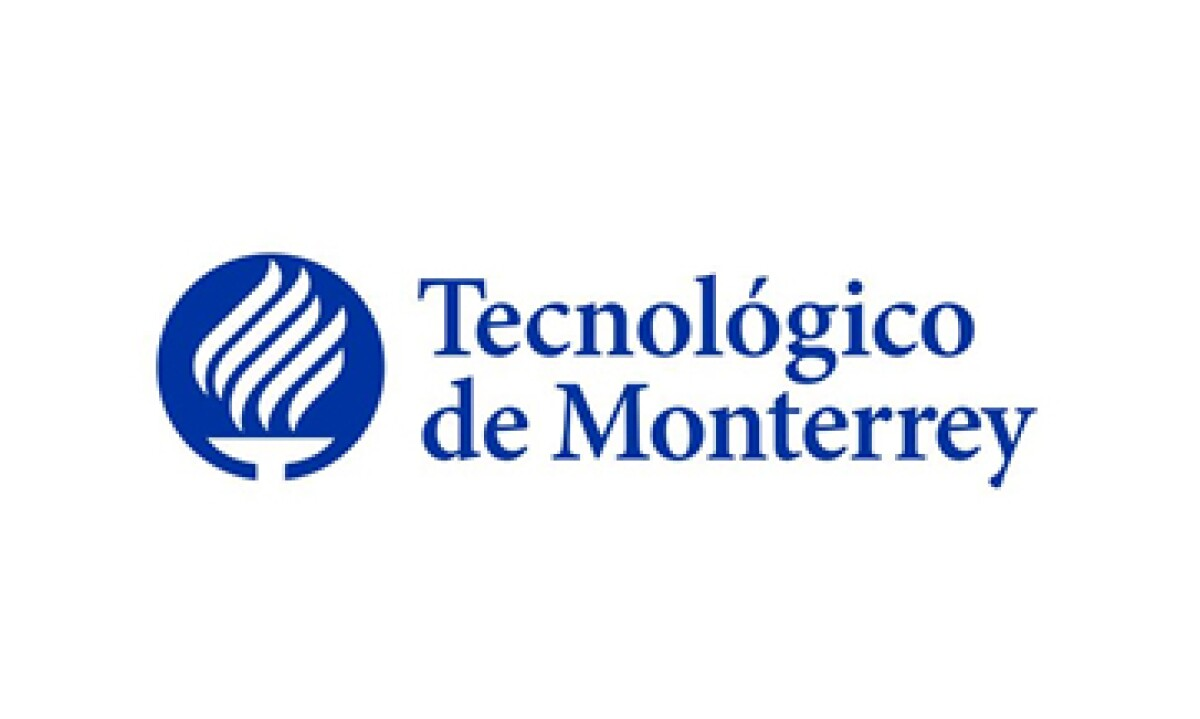

#**Maestr√≠a en Inteligencia Artificial Aplicada**
##**Proyecto Integrador**
###Tecnol√≥gico de Monterrey
###Prof Gretel Barcel√≥ Alonso

### **Semana 4**
####**Avance 2: Ingenieria de Caracteristicas**
# Equipo 1
#**Rodrigo Ruiz Gonzalez Matricula : A01793081**
#**Daniel Hernandez Mora Matricula : A01793538**
#**Juan Sebasti√°n T√©llez L√≥pez Matricula : A01793859**

# üëã **Ingenieria de caracteristicas**

---

La ingenier√≠a de caracter√≠sticas es un proceso crucial en el an√°lisis de datos y el aprendizaje autom√°tico. Implica transformar y seleccionar cuidadosamente las variables de los datos brutos para convertirlas en caracter√≠sticas que sean m√°s √∫tiles para los modelos de aprendizaje autom√°tico. El objetivo es mejorar la precisi√≥n, la eficiencia y la interpretabilidad de los modelos.

En el siguiente notebook vamos a realizar la preparaci√≥n de nuestro conjunto de entrenamiento, teniendo en cuenta t√©cnicas que nos permitan ajustar las caracteristicas, as√≠ como el conocimiento de negocio

# ‚û°Ô∏è **Importamos librerias e instalaciones requeridas**

---

Es importante usar las siguientes librerias porque:

- El an√°lisis de datos a menudo implica trabajar con datos estructurados y pandas destaca en esta tarea.
- Simplifica la limpieza, transformaci√≥n y an√°lisis de datos en comparaci√≥n con el uso de listas o diccionarios de Python sin formato.
- La estructura DataFrame permite operaciones intuitivas basadas en columnas (agregar, eliminar, modificar columnas).
- Proporciona m√©todos integrados para limpiar, filtrar, agrupar y unir datos.

In [ ]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FactorAnalysis

# ‚û°Ô∏è **Importamos nuestro input**

---

Nuestro Dataset est√° compuesto por 43 columnas con 557729 renglones, almacenados en un archivo con extension CSV

In [ ]:
#Archivo unificado y validado por cliente
df = pd.read_csv("input_final.csv", sep=',', encoding ="latin-1")
df.head(5)

DOCUMENTO  PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  \
0  11000000821          5               NO MOTIVO  √Ç¬†Asalariados.      F   
1  11000000821          5               NO MOTIVO  √Ç¬†Asalariados.      F   
2  11000000821         21  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F   
3  11000000821          5    SIN_ACCESO_A_CANALES  √Ç¬†Asalariados.      F   
4  11000000821          5  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F   

   EDAD      HORA  HORA_OK RANGO_HORA RANGO_HORA2  ... PRIM_CTA MORA_TEMPRANA  \
0    23  15:45:12       15      Tarde       Tarde  ...        X             X   
1    23   9:50:27        9     Ma√±ana      Ma√±ana  ...        X             X   
2    23   9:49:51        9     Ma√±ana      Ma√±ana  ...        X             X   
3    23  10:02:47       10     Ma√±ana      Ma√±ana  ...        X             X   
4    23  14:23:01       14      Tarde    Mediodia  ...        X             X   

  MANTENIDO  ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  NEGOCIACION_ACTIVA  \
0         X          HACER LLAMADA                YA PAGO                  NO   
1         X          HACER LLAMADA                YA PAGO                  NO   
2         X          HACER LLAMADA                YA PAGO                  NO   
3         X          HACER LLAMADA                YA PAGO                  NO   
4         X          HACER LLAMADA                YA PAGO                  NO   

  CANTIDAD_GESTIONES  GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS  \
0                9.0               1.0                        1.0   
1                9.0               1.0                        1.0   
2                9.0               1.0                        1.0   
3                9.0               1.0                        1.0   
4                9.0               1.0                        1.0   

  MARCA_TIPO_CARTERA  
0           PROD_DIG  
1           PROD_DIG  
2           PROD_DIG  
3           PROD_DIG  
4           PROD_DIG  

[5 rows x 43 columns]

# ‚û°Ô∏è **Separaci√≥n de nuestro dataset**

---

A continuaci√≥n vamos a dividir nuestro input en 3 conjuntos diferentes:

- El primero seran datos identificadores (***Nombres, documentos, n√∫meros de tel√©fono, etc.***) Los cuales no seran parte del conjunto de entrenamiento, sino que seran utilizados para agregar la etiqueta de las predicciones.
- El segundo conjunto ser√°n todas las variables que utilizaremos para el preprocesamiento de datos y en las cuales aplicaremos las t√©cnicas correspondientes.
- El tercero se refiere a nuestras variables predictoras, ya que vamos a tener diferentes formas de mostrarlas para la realizaci√≥n de diversos experimentos desde varios enfoques.

In [ ]:
df.columns

Index(['DOCUMENTO', 'PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO',
       'EDAD', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2',
       'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
       'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL',
       'CICLO_OBLIG', 'CIUDAD', 'CED_SIN_DIG', 'NOMBRES', 'SUB_PRODUCTO',
       'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL',
       'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA',
       'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO',
       'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES',
       'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA'],
      dtype='object')

## Identificadores

Los identificadores son nombres √∫nicos que se asignan a elementos del programa, como variables, funciones, clases, etiquetas de instrucci√≥n, entre otros. Estos nombres sirven para referirse a esos elementos de manera clara y consistente
en el c√≥digo, haciendo que el programa sea m√°s legible, comprensible y f√°cil de mantener

seleccionamos tres columnas espec√≠ficas (***'DOCUMENTO', 'CED_SIN_DIG' y 'NOMBRES'***) de los nombres de las columnas y las asignamos a un nuevo DataFrame llamado identificadores, estos no aportan datos significativos al modelo, pero nos permiten identicar los componentes de la tabla.

In [ ]:
identificadores = df.loc[:,['DOCUMENTO','CED_SIN_DIG','NOMBRES']]
identificadores.head(5)

DOCUMENTO  CED_SIN_DIG                  NOMBRES
0  11000000821   1000000821  ANA . MALAVER RODRIGUEZ
1  11000000821   1000000821  ANA . MALAVER RODRIGUEZ
2  11000000821   1000000821  ANA . MALAVER RODRIGUEZ
3  11000000821   1000000821  ANA . MALAVER RODRIGUEZ
4  11000000821   1000000821  ANA . MALAVER RODRIGUEZ

## Caracteristicas

Las variables seleccionadas son : ***'PRIORIDAD', 'MOTIVO_NO_PAGO','DESC_ACTIVIDAD', 'GENERO', 'EDAD', 'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL','RECUPERACION, 'MORA_INICIAL', 'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO', 'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL', 'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA', 'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO', 'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS' y  'MARCA_TIPO_CARTERA'***



Estas variables nos serviran para:

- **Comprensi√≥n de los datos**: Es fundamental comprender el contexto del problema, las caracter√≠sticas disponibles y su significado.
- **Limpieza y preprocesamiento de datos**: Se deben abordar los valores faltantes, outliers, inconsistencias y otros problemas de calidad de datos.
- **Exploraci√≥n de datos**: Visualizar y analizar los datos para comprender las distribuciones de las caracter√≠sticas, las correlaciones y las relaciones entre variables.
- **Creaci√≥n y transformaci√≥n de caracter√≠sticas**: Derivar nuevas caracter√≠sticas a partir de las existentes, como combinaciones, normalizaciones, escalados, discretizaciones, etc.
- **Selecci√≥n de caracter√≠sticas**: Elegir las caracter√≠sticas m√°s relevantes e informativas para el modelo, eliminando redundancias y aquellas que no aportan valor.
- **Evaluaci√≥n del impacto**: Evaluar el impacto de las caracter√≠sticas seleccionadas en el rendimiento del modelo mediante pruebas e iteraciones.

In [ ]:
features = df.loc[:,['PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO','EDAD','SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
                     'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL','CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO','SALDO_OBLIG', 'MORA_OBLIG',
                     'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL','RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA','MORA_TEMPRANA',
                     'MANTENIDO', 'ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES','GESTION_LLAMADAS',
                     'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA']]
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5               NO MOTIVO  √Ç¬†Asalariados.      F    23   
1          5               NO MOTIVO  √Ç¬†Asalariados.      F    23   
2         21  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F    23   
3          5    SIN_ACCESO_A_CANALES  √Ç¬†Asalariados.      F    23   
4          5  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC           NaN  NORMALIZADO            30            0  ...   
1          MONO_TC           NaN  NORMALIZADO            30            0  ...   
2          MONO_TC           NaN  NORMALIZADO            30            0  ...   
3          MONO_TC           NaN  NORMALIZADO            30            0  ...   
4          MONO_TC           NaN  NORMALIZADO            30            0  ...   

   PRIM_CTA MORA_TEMPRANA  MANTENIDO  ACCION_MEJOR_CONTACTO  \
0         X             X          X          HACER LLAMADA   
1         X             X          X          HACER LLAMADA   
2         X             X          X          HACER LLAMADA   
3         X             X          X          HACER LLAMADA   
4         X             X          X          HACER LLAMADA   

  EFECTO_MEJOR_CONTACTO NEGOCIACION_ACTIVA CANTIDAD_GESTIONES  \
0               YA PAGO                 NO                9.0   
1               YA PAGO                 NO                9.0   
2               YA PAGO                 NO                9.0   
3               YA PAGO                 NO                9.0   
4               YA PAGO                 NO                9.0   

  GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS MARCA_TIPO_CARTERA  
0              1.0                        1.0           PROD_DIG  
1              1.0                        1.0           PROD_DIG  
2              1.0                        1.0           PROD_DIG  
3              1.0                        1.0           PROD_DIG  
4              1.0                        1.0           PROD_DIG  

[5 rows x 36 columns]

## Variables predictoras

Las variables predictoras, tambi√©n conocidas como variables independientes, variables explicativas o covariables, son aquellas que se utilizan en un modelo estad√≠stico o de aprendizaje autom√°tico para **predecir o explicar una variable de respuesta**. En otras palabras, son las variables que se consideran como la causa de los cambios en la variable de respuesta.

In [ ]:
predictoras = df.loc[:,['HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2']]
predictoras.head(5)

HORA  HORA_OK RANGO_HORA RANGO_HORA2
0  15:45:12       15      Tarde       Tarde
1   9:50:27        9     Ma√±ana      Ma√±ana
2   9:49:51        9     Ma√±ana      Ma√±ana
3  10:02:47       10     Ma√±ana      Ma√±ana
4  14:23:01       14      Tarde    Mediodia

# ‚û°Ô∏è **Ajustar tipo de datos y posibles valores vacios en nuestras features**

---

Una vez separadas nuestras variables de interes para el modelo, vamos a iniciar por una validaci√≥n de posibles valores vacios y ajuste del tipo de datos

In [ ]:
# Llenar RIESGO_ACTUAL con 0 y NO_DEF
features["RIESGO_ACTUAL"].fillna("0 NO_DEF", inplace=True)

# Redondear C_RIESGO a n√∫mero entero
features["C_RIESGO"] = features["C_RIESGO"].astype(int)

# Llenar ESTADO_ICS_ACTUAL con NONE
features["ESTADO_ICS_ACTUAL"].fillna("NONE", inplace=True)

# Llenar DIAS_ACTUAL con 0
features["DIAS_ACTUAL"].fillna(0, inplace=True)

# Redondear DIAS_ACTUAL a n√∫mero entero
features["DIAS_ACTUAL"] = features["DIAS_ACTUAL"].astype(int)

###################################################################################################

# Redondear SALDO_OBLIG a n√∫mero entero
# Convertir valores a tipo float y manejar valores no num√©ricos como NaN
features["SALDO_OBLIG"] = pd.to_numeric(features["SALDO_OBLIG"], errors='coerce')

# Reemplazar valores NaN con 0
features["SALDO_OBLIG"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["SALDO_OBLIG"] = features["SALDO_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Redondear MORA_OBLIG a n√∫mero entero
# Convertir valores a tipo float y manejar valores no num√©ricos como NaN
features["MORA_OBLIG"] = pd.to_numeric(features["MORA_OBLIG"], errors='coerce')

# Reemplazar valores NaN con 0
features["MORA_OBLIG"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["MORA_OBLIG"] = features["MORA_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Redondear DIAS_OBLIG a n√∫mero entero
features["DIAS_OBLIG"] = features["DIAS_OBLIG"].astype(int)

###################################################################################################

# Convertir valores a tipo float y manejar valores no num√©ricos como NaN
features["SALDO_CL"] = pd.to_numeric(features["SALDO_CL"], errors='coerce')

# Reemplazar valores NaN con 0
features["SALDO_CL"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["SALDO_CL"] = features["MORA_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Obtener el primer d√≠gito de RANGO_CL
features["RANGO_CL"] = features["RANGO_CL"].apply(lambda row: int(str(row).split("_")[0]))

# Reemplazar "." por 0 en SCORE
features["SCORE"] = features["SCORE"].str.replace(".", "0")

# Cambiar el formato de F_APERTURA a DD/MM/YYYY
features["F_APERTURA"] = pd.to_datetime(features["F_APERTURA"], format='%d/%m/%Y', errors='coerce').dt.date

# Calcular la diferencia de d√≠as entre la fecha de hoy y F_APERTURA
fecha_actual = pd.Timestamp.now().normalize()  # Obtener la fecha actual en formato Timestamp
features["F_APERTURA"] = (fecha_actual - pd.to_datetime(features["F_APERTURA"])).dt.days

# Llenar valores nulos con 0
features["F_APERTURA"].fillna(0, inplace=True)

# Convertir a tipo entero
features["F_APERTURA"] = features["F_APERTURA"].astype(int)

# Redondear CANTIDAD_GESTIONES a n√∫mero entero
features['CANTIDAD_GESTIONES'].fillna(0, inplace=True)
features["CANTIDAD_GESTIONES"] = features["CANTIDAD_GESTIONES"].apply(lambda x: int(round(x)))

# Redondear GESTION_LLAMADAS a n√∫mero entero
features['GESTION_LLAMADAS'].fillna(0, inplace=True)
features["GESTION_LLAMADAS"] = features["GESTION_LLAMADAS"].apply(lambda x: int(round(x)))

# Redondear CONTEO_CONTACTOS_DIRECTOS a n√∫mero entero
features['CONTEO_CONTACTOS_DIRECTOS'].fillna(0, inplace=True)
features["CONTEO_CONTACTOS_DIRECTOS"] = features["CONTEO_CONTACTOS_DIRECTOS"].apply(lambda x: int(round(x)))

features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5               NO MOTIVO  √Ç¬†Asalariados.      F    23   
1          5               NO MOTIVO  √Ç¬†Asalariados.      F    23   
2         21  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F    23   
3          5    SIN_ACCESO_A_CANALES  √Ç¬†Asalariados.      F    23   
4          5  ASA_REDUCCION_INGRESOS  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   PRIM_CTA MORA_TEMPRANA  MANTENIDO  ACCION_MEJOR_CONTACTO  \
0         X             X          X          HACER LLAMADA   
1         X             X          X          HACER LLAMADA   
2         X             X          X          HACER LLAMADA   
3         X             X          X          HACER LLAMADA   
4         X             X          X          HACER LLAMADA   

  EFECTO_MEJOR_CONTACTO NEGOCIACION_ACTIVA  CANTIDAD_GESTIONES  \
0               YA PAGO                 NO                   9   
1               YA PAGO                 NO                   9   
2               YA PAGO                 NO                   9   
3               YA PAGO                 NO                   9   
4               YA PAGO                 NO                   9   

   GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS MARCA_TIPO_CARTERA  
0                 1                          1           PROD_DIG  
1                 1                          1           PROD_DIG  
2                 1                          1           PROD_DIG  
3                 1                          1           PROD_DIG  
4                 1                          1           PROD_DIG  

[5 rows x 36 columns]

## Validaci√≥n de que ya no tengamos valores faltantes

 La validaci√≥n de que no hay valores faltantes en un conjunto de datos es un paso crucial en el an√°lisis de datos y el aprendizaje autom√°tico. Los valores faltantes, tambi√©n conocidos como datos perdidos o incompletos, pueden tener un impacto significativo en la calidad y confiabilidad de los resultados.

 Es esencial para garantizar la calidad, confiabilidad y precisi√≥n de los an√°lisis y modelos de aprendizaje autom√°tico. Al comprender y manejar adecuadamente los valores faltantes, se pueden obtener resultados m√°s robustos y representativos de la realidad.

In [ ]:
# Calcular los valores faltantes
missing_data = features.isnull().sum()
missing_data_percentage = (missing_data / len(features)) * 100
missing_data_summary = pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total', 'Porcentaje'])
missing_data_df = pd.DataFrame(missing_data_summary, columns=['Total', 'Porcentaje'])

# Agregar un mensaje antes del DataFrame
total_records = len(features)
message = f"De un total de {total_records} registros se encuentran los siguientes valores faltantes:\n"
print(message)
missing_data_df.head(50)

De un total de 557729 registros se encuentran los siguientes valores faltantes:



Total  Porcentaje
PRIORIDAD                      0         0.0
MOTIVO_NO_PAGO                 0         0.0
DESC_ACTIVIDAD                 0         0.0
GENERO                         0         0.0
EDAD                           0         0.0
SEGMENTO_CLIENTE               0         0.0
RIESGO_ACTUAL                  0         0.0
RECUPERACION                   0         0.0
MORA_INICIAL                   0         0.0
MORA_ACTUAL                    0         0.0
C_RIESGO                       0         0.0
ESTADO_ICS_ACTUAL              0         0.0
DIAS_ACTUAL                    0         0.0
CICLO_OBLIG                    0         0.0
CIUDAD                         0         0.0
SUB_PRODUCTO                   0         0.0
SALDO_OBLIG                    0         0.0
MORA_OBLIG                     0         0.0
DIAS_OBLIG                     0         0.0
TIPO_CLIENTE                   0         0.0
SALDO_CL                       0         0.0
RANGO_SALDO                    0         0.0
DIAS_CL                        0         0.0
RANGO_CL                       0         0.0
SCORE                          0         0.0
F_APERTURA                     0         0.0
PRIM_CTA                       0         0.0
MORA_TEMPRANA                  0         0.0
MANTENIDO                      0         0.0
ACCION_MEJOR_CONTACTO          0         0.0
EFECTO_MEJOR_CONTACTO          0         0.0
NEGOCIACION_ACTIVA             0         0.0
CANTIDAD_GESTIONES             0         0.0
GESTION_LLAMADAS               0         0.0
CONTEO_CONTACTOS_DIRECTOS      0         0.0
MARCA_TIPO_CARTERA             0         0.0

# ‚û°Ô∏è **Generaci√≥n de nuevas caracteristicas**

---

A *continuaci√≥n* se dar√° una justificaci√≥n detallada de que transformaciones se realizar√°n, cuales no seran necesesarias y si habra exclusi√≥n de variables por alg√∫n motivo:

- ***PRIORIDAD***: Solo basta con llenar los vacios en 0, ya que si no tienen un valor asignado no requieren una gesti√≥n inmediata.
- ***MOTIVO_NO_PAGO***: Vacios se reemplazaron por ***NO MOTIVO***, desde el archivo de unificaci√≥n de bases, no se realizar√°n agrupaciones ya que no son tantas categorias que puedan sobredimensionar esta categoria.
- ***DESC_ACTIVIDAD***: Se requiere hacer una agrupaci√≥n por categorias un poco mas generales, por ejemplo, en un grupo todas las relacionadas con comercio, otras con transporte, otras con educaci√≥n, ya que hay categorias en las que solo aplica un porcentaje menor al 1% de clientes y esto puede sobredimensionar el entrenamiento del modelo innecesariamente.
- ***GENERO***: Previamente en el notebook de unificaci√≥n de bases se garantiz√≥ que los valores vac√≠os fueran reemplazados por ***D***, lo cual indica que no son definidos, no necesitamos realizar ninguna transformaci√≥n adicional.
- **EDAD**: Previamente en el notebook de unificaci√≥n de bases a partir de la fecha de nacimiento en formato *dd/mm/aaaa* se hizo la diferencia al d√≠a actual para obtener la edad del cliente, por lo tanto, no necesitamos ninguna transformaci√≥n adicional.
- ***SEGMENTO***: Se deja tal cual, ya que solo vienen dos categorias ***MONO_TC*** que indica que el cliente solo tiene un producto financiero y ***MULTI_TC*** que indica que el cliente tiene, mas de un producto financiero.
- ***RIESGO ACTUAL***: Actualmente viene con el estilo "0, NO, DEF, 4, MEDIO, 6, ALTO, etc". De esta columna vamos a tomar los numeros nada m√°s, ya que entre mayor, es m√°s el riesgo y no impacta en nada el quitar la etiqueta de la clasificaci√≥n.
- ***RECUPERACI√ìN***: Se dejaran las categor√≠as como vienen, y m√°s adelante se les aplicar√° la respectiva codificaci√≥n para variables categ√≥ricas.
- ***MORA INICIAL*** y ***MORA ACTUAL***, ***DIAS_ACTUAL***, ***DIAS_OBLIG***: Se dejaran tal cual, ya que es la clasificaci√≥n que tiene al cliente respecto a los d√≠as en mora.
- ***C_RIESGO, SCORE***: Se eliminar√°n valores negativos que vienen de clasificaciones incorrectas por parte del cliente y se dejaran en 0, al no conocer de que manera es calculada.
- ***ESTADO_ICS_ACTUAL***: Este es un dato proveniente del estado actual de gesti√≥n con el cliente, el cual viene por defecto en ingles, pero no afecta en su posterior codificaci√≥n como variable categorica.
- ***CICLO_OBLIG***: Se deja tal cual, posteriormente se evaluar√° si se excluye, dependiendo de su impacto en el entrenamiento del modelo, este es un dato valioso para la operaci√≥n ya que permite identificar que d√≠a el cliente debe realizar el pago.
- ***CIUDAD***: Es una caracteristica de bastante importancia para el modelo, pero evaluarse cuidadosamente la manera en que va a ser codificada, ya que no es posible mediante un "*one hot encoder*" debido al alto numero de categor√≠as, por lo tanto se optara inicialmente por un "*Target encoding*" o una "*codificaci√≥n de frecuencia agrupada*", para evitar generar columnas adicionales que sobrecarguen el entrenamiento.
- ***SUB_PRODUCTO***: No tiene tantas categor√≠as y de momento no se evalua la posibilidad de agrupar por franquicia, ya que este campo nos especifica el tipo de producto que tiene el cliente EJ Visa Platinum, y esto puede permitir una mejor clasificaci√≥n de los clientes.
- ***SALDO_OBLIG, MORA_OBLIG***: Corresponden a saldos que se dejar√°n en tipo entero, si bien no se realiza un ordenamiento por los saldos, si es una medici√≥n importante de la cartera a recuperar.
- ***TIPO_CLIENTE***: Es una clasificaci√≥n muy importante que nos permite conocer  m√°s sobre el comportamiento financiero del cliente.
- ***SALDO_CL***: Ser√° excluida ya que contiene la misma informaci√≥n quela variable ***SALDO_OBLIG***.
- ***RANGO_SALDO***: Contiene los saldos dentro de unos rangos, los cuales son un poco amplios, sera excluida ya que se cuenta con el campo RANGO_CL el cual enumera dichos rangos de saldo y ya ahorra realizar una transformaci√≥n adicional.
- ***DIAS_CL***: Sera excluida, ya que es un duplicado de ***DIAS_OBLIG***.
- ***F_APERTURA***: Previamente se hizo una transformaci√≥n para tener la cantidad de d√≠as transcurridos desde la creaci√≥n de la cuenta, lo cual nos dar√≠a la antiguedad del cliente y podr√≠a ayudar a la clasificaci√≥n del mismo.
- ***PRIM_CTA, MORA_TEMPRANA, MANTENIDO***: Se excluir√°n del modelo, ya que hacen referencia a estados de cartera en los cuales se encuentra el cliente, y para esta base, todos hacen parte de un mismo segmento de clientes (Cartera reciente), que son clientes que no tienen estados de mora muy amplios.
- ***ACCION_MEJOR_CONTACTO, EFECTO_MEJOR_CONTACTO***: Se les aplicar√° la respectiva codificaci√≥n "*one hot encoding*", ya que no tienen tantas categorias y es informaci√≥n hist√≥rica relevante sobre gestiones previas que ha tenido el cliente.
- ***NEGOCIACION_ACTIVA***: Nos indica si el cliente se encuentra en algun proceso para la gesti√≥n del cobro, por lo tanto se le aplicar√° la respectiva codificaci√≥n "*one hot encoding*".
- ***CANTIDAD_GESTIONES, GESTION_LLAMADAS, CONTEO_CONTACTOS_DIRECTOS***: Referentes a intentos previos realizados al cliente, se les aplicar√° la respectiva codificaci√≥n.
- ***MARCA_TIPO_CARTERA***: Referente a si el cliente tiene algun beneficio por parte del estado, lo cual alivianar√≠a el momento de la negociaci√≥n para la recuperaci√≥n de la cartera.

## DESC_ACT

**Diccionario de Mapeo (mapeo):**

El proceso comienza con la definici√≥n de un diccionario de mapeo. Este diccionario asocia categor√≠as generales con categor√≠as espec√≠ficas basadas en la naturaleza de los datos. Cada clave en el diccionario representa una categor√≠a general, y su valor correspondiente es una lista de categor√≠as espec√≠ficas asociadas a esa categor√≠a general. Por ejemplo:

mapeo = {
    "Manufactura": ["Fabricaci√≥n de motores", "Fabricaci√≥n de productos de metal", ...],
    "Medio ambiente": ["Captaci√≥n y tratamiento de agua", "Actividades de apoyo para la extracci√≥n de petr√≥leo", ...],
    ...
}

**Funci√≥n para Aplicar el Mapeo (aplicar_mapeo):**

Se define una funci√≥n llamada aplicar_mapeo que toma una categor√≠a espec√≠fica como entrada y busca en el diccionario de mapeo para encontrar la categor√≠a general correspondiente. Si la categor√≠a espec√≠fica est√° presente en el diccionario de mapeo, devuelve la categor√≠a general asociada. En caso contrario, devuelve una categor√≠a predeterminada, como "Asalariados".
Esta funci√≥n utiliza la l√≥gica de b√∫squeda en el diccionario de mapeo para asignar una categor√≠a general a cada categor√≠a espec√≠fica en el DataFrame.
Aplicaci√≥n del Mapeo al DataFrame:

Se aplica la funci√≥n aplicar_mapeo a la columna de inter√©s del DataFrame features. En este caso, la columna se llama "DESC_ACTIVIDAD". La funci√≥n asigna una categor√≠a general a cada fila del DataFrame seg√∫n el mapeo definido.
El resultado se almacena en una nueva columna llamada "Categoria general" en el DataFrame features.
Codificaci√≥n de Target:

Para preparar los datos para el entrenamiento de un modelo de aprendizaje autom√°tico, a menudo es necesario codificar las variables categ√≥ricas en n√∫meros enteros. Para esto, se utiliza la codificaci√≥n de target.
Se crea una instancia de la clase LabelEncoder de scikit-learn. Esta clase asigna un n√∫mero entero √∫nico a cada categor√≠a en la columna "DESC_ACTIVIDAD".
Se ajusta y transforma la columna "DESC_ACTIVIDAD" utilizando el m√©todo fit_transform del LabelEncoder. Cada categor√≠a √∫nica se asigna a un n√∫mero entero √∫nico y se almacena en una nueva columna llamada "DESC_ACTIVIDAD_codificado" en el DataFrame features.

**Ventajas y Aportes:**

**Simplificaci√≥n de Datos:** El proceso de mapeo y codificaci√≥n de target simplifica los datos al reducir la complejidad de las categor√≠as espec√≠ficas a categor√≠as generales y n√∫meros enteros, respectivamente.
Facilita el Entrenamiento del Modelo: Los modelos de aprendizaje autom√°tico suelen requerir que todas las variables sean num√©ricas. La codificaci√≥n de target convierte las variables categ√≥ricas en un formato que puede ser entendido por los algoritmos de aprendizaje autom√°tico.
**Mejora del Rendimiento del Modelo:** Al convertir las categor√≠as en n√∫meros enteros, se pueden capturar relaciones y patrones que pueden ser √∫tiles para el modelo. Adem√°s, la codificaci√≥n de target puede ayudar a reducir el sesgo que puede surgir al trabajar con variables categ√≥ricas.

In [ ]:
mapeo = {
    "Actividades agricolas": ['Actividades de apoyo a la agricultura.','Actividades de apoyo a la ganader√É¬≠a.','Cr√É¬≠a de aves de corral.','Cr√É¬≠a de caballos y otros equinos.','Cr√É¬≠a de ganado bovino y bufalino.','Cr√É¬≠a de ganado porcino.',
                              'Cr√É¬≠a de otros animales n.c.p.','Cultivo de arroz.','Cultivo de ca√É¬±a de az√É¬∫car.','Cultivo de caf√É¬©.','Cultivo de cereales (excepto arroz), legumbres y semillas oleaginosas.','Cultivo de especias y de plantas arom√É¬°ticas y medicinales.',
                              'Cultivo de flor de corte.','Cultivo de frutas tropicales y subtropicales.','Cultivo de hortalizas, ra√É¬≠ces y tub√É¬©rculos.','Cultivo de palma para aceite (palma africana) y otros frutos oleaginosos.',
                              'Cultivo de pl√É¬°tano y banano.','Cultivo de plantas textiles.','Cultivo de tabaco.','Explotaci√É¬≥n mixta (agr√É¬≠cola y pecuaria).','Pesca de agua dulce.','Preparaci√É¬≥n del terreno.','Trilla de caf√É¬©.'],
    "Actividades culturales":['Creaci√É¬≥n audiovisual.','Creaci√É¬≥n musical.','Creaci√É¬≥n teatral.','ctividades de exhibici√É¬≥n de pel√É¬≠culas cinematogr√É¬°ficas y videos.'],
    "Arte":['Actividades de distribuci√É¬≥n de pel√É¬≠culas cinematogr√É¬°ficas, videos, programas, anuncios y comerciales de televisi√É¬≥n.','Actividades de espect√É¬°culos musicales en vivo.','Actividades de fotograf√É¬≠a.',
            'Actividades de grabaci√É¬≥n de sonido y edici√É¬≥n de m√É¬∫sica.','Actividades de impresi√É¬≥n.','Actividades de posproducci√É¬≥n de pel√É¬≠culas cinematogr√É¬°ficas, videos, programas, anuncios y comerciales de televisi√É¬≥n.','Actividades de producci√É¬≥n de pel√É¬≠culas cinematogr√É¬°ficas, videos, programas, anuncios y comerciales de televisi√É¬≥n.',
            'Actividades de programaci√É¬≥n y transmisi√É¬≥n de televisi√É¬≥n.','Actividades de programaci√É¬≥n y transmisi√É¬≥n en el servicio de radiodifusi√É¬≥n sonora.','Actividades de servicios relacionados con la impresi√É¬≥n.',
            'Actividades especializadas de dise√É¬±o.','Actividades teatrales.','Artes pl√É¬°sticas y visuales.'],
    "Asalariados":['Asalariados.','√Ç¬†Asalariados.','√Ç¬†Rentistas de Capital, solo para personas naturales.','Actividades combinadas de apoyo a instalaciones.','Actividades combinadas de servicios administrativos de oficina','Actividades de administraci√É¬≥n de fondos.',
                   'Actividades de agencias de cobranza y oficinas de calificaci√É¬≥n crediticia.','Actividades de agencias de empleo temporal.','Actividades de agencias de empleo.','Actividades de agentes y corredores de seguros','Actividades de apoyo diagn√É¬≥stico.',
                   'Actividades de asociaciones pol√É¬≠ticas.','Actividades de asociaciones profesionales','Actividades de asociaciones religiosas.','Actividades de bibliotecas y archivos.','Actividades de clubes deportivos.','Actividades de contabilidad, tenedur√É¬≠a de libros, auditor√É¬≠a financiera y asesor√É¬≠a tributaria.',
                   'Actividades de defensa.','Actividades de detectives e investigadores privados.','Actividades de las casas de cambio.','Actividades de las corporaciones financieras.','Actividades de los profesionales de compra y venta de divisas.',
                   'Actividades de mensajer√É¬≠a.','Actividades de otras asociaciones n.c.p.','Actividades de otros servicios de comidas.','Actividades de seguridad privada.','Actividades ejecutivas de la administraci√É¬≥n p√É¬∫blica.','Actividades ejecutivas de la administraci√≥n p√∫blica.',
                   'Actividades inmobiliarias realizadas a cambio de una retribuci√É¬≥n o por contrata.','Actividades inmobiliarias realizadas con bienes propios o arrendados.','Actividades jur√É¬≠dicas.',
                   'Actividades legislativas de la administraci√É¬≥n p√É¬∫blica.','Actividades no diferenciadas de los hogares individuales como productores de bienes para uso propio.','Actividades no diferenciadas de los hogares individuales como productores de servicios para uso propio.',
                   'Actividades postales nacionales.','Actividades reguladoras y facilitadoras de la actividad econ√É¬≥mica.','Administraci√É¬≥n de justicia.','Almacenamiento y dep√É¬≥sito.','Alquiler de videos y discos.','Alquiler y arrendamiento de equipo recreativo y deportivo.',
                   'Alquiler y arrendamiento de otros efectos personales y enseres dom√É¬©sticos n.c.p.','Alquiler y arrendamiento de otros tipos de maquinaria, equipo y bienes tangibles n.c.p.','Alquiler y arrendamiento de veh√É¬≠culos automotores.',
                   'Capitalizaci√É¬≥n.','Catering para eventos.','Evaluaci√É¬≥n de riesgos y da√É¬±os, y otras actividades de servicios auxiliares','Instituciones especiales oficiales.','Orden p√É¬∫blico y actividades de seguridad.','Organizaci√É¬≥n de convenciones y eventos comerciales.',
                   'Peluquer√É¬≠a y otros tratamientos de belleza.','perfumes y preparados de tocador. Fabricaci√É¬≥n de otros productos qu√É¬≠micos n.c.p.','Pompas f√É¬∫nebres y actividades relacionadas.','R√É¬©gimen de ahorro individual (RAI).','R√É¬©gimen de prima media con prestaci√É¬≥n definida (RPM).',
                   'Seguros de vida.','Seguros generales.','Servicio por horas',],
    "Aseo":['√Ç¬†Actividades de los hogares individuales como empleadores de personal dom√É¬©stico.','√Ç¬†Actividades de saneamiento ambiental y otros servicios de gesti√É¬≥n de desechos.','Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de piel.',
            'Limpieza general interior de edificios.'],
    "Comercio al por mayor ":['Comercio al por mayor a cambio de una retribuci√É¬≥n o por contrata.','Comercio al por mayor de aparatos y equipo de uso dom√É¬©stico.','Comercio al por mayor de bebidas y tabaco.','Comercio al por mayor de calzado.','Comercio al por mayor de combustibles s√É¬≥lidos, l√É¬≠quidos, gaseosos y productos conexos.',
                              'Comercio al por mayor de computadores, equipo perif√É¬©rico y programas de inform√É¬°tica.','Comercio al por mayor de desperdicios, desechos y chatarra.','Comercio al por mayor de equipo, partes y piezas electr√É¬≥nicos y de telecomunicaciones.','Comercio al por mayor de maquinaria y equipo agropecuarios.',
                              'Comercio al por mayor de materiales de construcci√É¬≥n, art√É¬≠culos de ferreter√É¬≠a, pinturas, productos de vidrio, equipo y materiales de fontaner√É¬≠a y calefacci√É¬≥n.','Comercio al por mayor de metales y productos metal√É¬≠feros.',
                              'Comercio al por mayor de otros productos n.c.p.','Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.','Comercio al por mayor de otros utensilios dom√É¬©sticos n.c.p.','Comercio al por mayor de prendas de vestir.',
                              'Comercio al por mayor de productos alimenticios.','Comercio al por mayor de productos farmac√É¬©uticos, medicinales, cosm√É¬©ticos y de tocador.','Comercio al por mayor de productos qu√É¬≠micos b√É¬°sicos, cauchos y pl√É¬°sticos en formas primarias y productos qu√É¬≠micos de uso agropecuario.',
                              'Comercio al por mayor de productos textiles, productos confeccionados para uso dom√É¬©stico.','Comercio al por mayor no especializado.'],
    "Comercio al por menor":['¬†Comercio al por menor de art√≠culos y utensilios de uso dom√©stico.','√Ç¬†Comercio al por menor de alimentos, bebidas y tabaco, en puestos de venta m√É¬≥viles.','√Ç¬†Comercio al por menor de art√É¬≠culos de ferreter√É¬≠a, pinturas y productos de vidrio en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor de art√É¬≠culos de segunda mano.','√Ç¬†Comercio al por menor de art√É¬≠culos deportivos, en establecimientos especializados.','√Ç¬†Comercio al por menor de art√É¬≠culos y utensilios de uso dom√É¬©stico.','√Ç¬†Comercio al por menor de combustible para automotores.',
                             '√Ç¬†Comercio al por menor de computadores, equipos perif√É¬©ricos, programas de inform√É¬°tica y equipos de telecomunicaciones en establecimientos especializados.','√Ç¬†Comercio al por menor de electrodom√É¬©sticos y gasodom√É¬©sticos de uso dom√É¬©stico, muebles y equipos de iluminaci√É¬≥n.',
                             '√Ç¬†Comercio al por menor de equipos y aparatos de sonido y de video, en establecimientos especializados.','√Ç¬†Comercio al por menor de libros, peri√É¬≥dicos, materiales y art√É¬≠culos de papeler√É¬≠a y escritorio, en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor de lubricantes (aceites, grasas), aditivos y productos de limpieza para veh√É¬≠culos automotores.','√Ç¬†Comercio al por menor de otros art√É¬≠culos culturales y de entretenimiento n.c.p. en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor de otros art√É¬≠culos dom√É¬©sticos en establecimientos especializados.','√Ç¬†Comercio al por menor de otros productos en puestos de venta m√É¬≥viles.','√Ç¬†Comercio al por menor de otros productos nuevos en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor de prendas de vestir y sus accesorios (incluye art√É¬≠culos de piel) en establecimientos especializados.','√Ç¬†Comercio al por menor de productos farmac√É¬©uticos y medicinales, cosm√É¬©ticos y art√É¬≠culos de tocador en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor de productos textiles en establecimientos especializados.','√Ç¬†Comercio al por menor de tapices, alfombras y cubrimientos para paredes y pisos en establecimientos especializados.','√Ç¬†Comercio al por menor de todo tipo de calzado y art√É¬≠culos de cuero y suced√É¬°neos del cuero en establecimientos especializados.',
                             '√Ç¬†Comercio al por menor realizado a trav√É¬©s de casas de venta o por correo.','√Ç¬†Comercio al por menor realizado a trav√É¬©s de internet.','abaco, en establecimientos especializados. 4721 Comercio al por menor de productos agr√É¬≠colas para el consumo en establecimientos especializados.',
                             'Comercio al por menor de bebidas y productos del tabaco, en establecimientos especializados.','Comercio al por menor de carnes (incluye aves de corral), productos c√É¬°rnicos, pescados y productos de mar, en establecimientos especializados.',
                             'Comercio al por menor de leche, productos l√É¬°cteos y huevos, en establecimientos especializados.','Comercio al por menor de otros productos alimenticios n.c.p., en establecimientos especializados.','Comercio al por menor en establecimientos no especializados con surtido compuesto principalmente por alimentos, bebidas o tabaco.',
                             'Comercio al por menor en establecimientos no especializados, con surtido compuesto principalmente por productos diferentes de alimentos (v√É¬≠veres en general), bebidas y tabaco.','Comercio de motocicletas y de sus partes, piezas y accesorios.',
                             'Comercio de partes, piezas (autopartes) y accesorios (lujos) para veh√É¬≠culos automotores','Comercio de veh√É¬≠culos automotores nuevos.','Comercio de veh√É¬≠culos automotores usados.','Expendio a la mesa de comidas preparadas.','Expendio de bebidas alcoh√É¬≥licas para el consumo dentro del establecimiento.',
                             'Expendio de comidas preparadas en cafeter√É¬≠as.','Expendio por autoservicio de comidas preparadas.','√Ç¬†Otros tipos de comercio al por menor no realizado en establecimientos, puestos de venta o mercados.'],
    "Construccion":['√Ç¬†Otras actividades especializadas para la construcci√É¬≥n de edificios y obras de ingenier√É¬≠a civil.','Construcci√É¬≥n de carreteras y v√É¬≠as de ferrocarril.','Construcci√É¬≥n de edificios no residenciales.','Construcci√É¬≥n de edificios residenciales.',
                    'Construcci√É¬≥n de otras obras de ingenier√É¬≠a civil.','Construcci√É¬≥n de proyectos de servicio p√É¬∫blico.','Demolici√É¬≥n.','Terminaci√É¬≥n y acabado de edificios y obras de ingenier√É¬≠a civil.'],
    "Educacion":['Actividades de apoyo a la educaci√É¬≥n.','Educaci√É¬≥n b√É¬°sica primaria.','Educaci√É¬≥n b√É¬°sica secundaria.','Educaci√É¬≥n de instituciones universitarias o de escuelas tecnol√É¬≥gicas.','Educaci√É¬≥n de la primera infancia.',
                 'Educaci√É¬≥n de universidades.','Educaci√É¬≥n media t√É¬©cnica y de formaci√É¬≥n laboral.','Educaci√É¬≥n preescolar.','Educaci√É¬≥n t√É¬©cnica profesional.','Educaci√É¬≥n tecnol√É¬≥gica.','Ense√É¬±anza cultural.','Ense√É¬±anza deportiva y recreativa.'
                 '√Ç¬†Investigaciones y desarrollo experimental en el campo de las ciencias naturales y la ingenier√É¬≠a.','√Ç¬†Investigaciones y desarrollo experimental en el campo de las√Ç¬† ciencias√Ç¬† sociales y las humanidades.'],
    "Elaboracion alimentos":['Elaboraci√É¬≥n de almidones y productos derivados del almid√É¬≥n.','Elaboraci√É¬≥n de bebidas no alcoh√É¬≥licas, producci√É¬≥n de aguas minerales y de otras aguas embotelladas.','Elaboraci√É¬≥n de cacao, chocolate y productos de confiter√É¬≠a.',
                             'Elaboraci√É¬≥n de comidas y platos preparados.','Elaboraci√É¬≥n de macarrones, fideos, alcuzcuz y productos farin√É¬°ceos similares.','Elaboraci√É¬≥n de otros productos alimenticios n.c.p.','Elaboraci√É¬≥n de panela.',
                             'Elaboraci√É¬≥n de productos de moliner√É¬≠a.','Elaboraci√É¬≥n de productos de panader√É¬≠a.','Elaboraci√É¬≥n de productos l√É¬°cteos.','√Ç¬†Procesamiento y conservaci√É¬≥n de carne y productos c√É¬°rnicos.','√Ç¬†Procesamiento y conservaci√É¬≥n de pescados, crust√É¬°ceos y moluscos.',
                             'Procesamiento y conservaci√É¬≥n de frutas, legumbres, hortalizas y tub√É¬©rculos.','Producci√É¬≥n de malta, elaboraci√É¬≥n de cervezas y otras bebidas malteadas.'],
    "Mantenimiento y reparacion":['Mantenimiento y reparaci√É¬≥n de aparatos electr√É¬≥nicos de consumo.','Mantenimiento y reparaci√É¬≥n de aparatos y equipos dom√É¬©sticos y de jardiner√É¬≠a.','Mantenimiento y reparaci√É¬≥n de motocicletas y de sus partes y piezas.',
                                  'Mantenimiento y reparaci√É¬≥n de otros efectos personales y enseres dom√É¬©sticos.','Mantenimiento y reparaci√É¬≥n de otros tipos de equipos y sus componentes n.c.p.','Mantenimiento y reparaci√É¬≥n de veh√É¬≠culos automotores.',
                                  'Mantenimiento y reparaci√É¬≥n especializado de equipo de transporte, excepto los veh√É¬≠culos automotores, motocicletas y bicicletas.','Mantenimiento y reparaci√É¬≥n especializado de equipo el√É¬©ctrico.',
                                  'Mantenimiento y reparaci√É¬≥n especializado de maquinaria y equipo.','Mantenimiento y reparaci√É¬≥n especializado de productos elaborados en metal.'],
    "Manufactura": ["Fabricaci√É¬≥n de motores, turbinas, y partes para motores de combusti√É¬≥n interna.","Fabricaci√É¬≥n de otros productos laborados de metal n.c.p.","Aserrado, acepillado e impregnaci√É¬≥n de la madera.","Manipulaci√É¬≥n de carga.","abricaci√É¬≥n de equipo de medici√É¬≥n, prueba, navegaci√É¬≥n y control",
                    "Acabado de productos textiles.","Actividad de mezcla de combustibles.","Actividades de envase y empaque.","Confecci√É¬≥n de art√É¬≠culos con materiales textiles, excepto prendas de vestir.","Confecci√É¬≥n de prendas de vestir, excepto prendas de piel.",
                    "Corretaje de valores y de contratos de productos b√É¬°sicos.","Corte, tallado y acabado de la piedra.","Destilaci√É¬≥n, rectificaci√É¬≥n y mezcla de bebidas alcoh√É¬≥licas.","Fabricaci√É¬≥n de art√É¬≠culos de cuchiller√É¬≠a, herramientas de mano y art√É¬≠culos de ferreter√É¬≠a.",
                    "Fabricaci√É¬≥n de art√É¬≠culos de piel.","Fabricaci√É¬≥n de art√É¬≠culos de pl√É¬°stico n.c.p.","Fabricaci√É¬≥n de art√É¬≠culos de viaje, bolsos de mano y art√É¬≠culos similares elaborados en cuero, y fabricaci√É¬≥n de art√É¬≠culos de talabarter√É¬≠a y guarnicioner√É¬≠a.","Fabricaci√É¬≥n de calzado de cuero y piel, con cualquier tipo de suela.",
                    "Fabricaci√É¬≥n de colchones y somieres.","Fabricaci√É¬≥n de computadoras y de equipo perif√É¬©rico.","Fabricaci√É¬≥n de equipo de irradiaci√É¬≥n y equipo electr√É¬≥nico de uso m√É¬©dico y terap√É¬©utico.","Fabricaci√É¬≥n de equipos el√É¬©ctricos de iluminaci√É¬≥n.",
                    "Fabricaci√É¬≥n de fibras sint√É¬©ticas y artificiales.","Fabricaci√É¬≥n de formas b√É¬°sicas de caucho y otros productos de caucho n.c.p.","Fabricaci√É¬≥n de formas b√É¬°sicas de pl√É¬°stico.","Fabricaci√É¬≥n de herramientas manuales con motor.",
                    "Fabricaci√É¬≥n de instrumentos musicales.","Fabricaci√É¬≥n de instrumentos, aparatos y materiales m√É¬©dicos y odontol√É¬≥gicos (incluido mobiliario).","Fabricaci√É¬≥n de joyas, bisuter√É¬≠a y art√É¬≠culos conexos.","Fabricaci√É¬≥n de juegos, juguetes y rompecabezas.",
                    "Fabricaci√É¬≥n de llantas y neum√É¬°ticos de caucho","Fabricaci√É¬≥n de maquinaria agropecuaria y forestal.","Fabricaci√É¬≥n de maquinaria para explotaci√É¬≥n de minas y canteras y para obras de construcci√É¬≥n.","Fabricaci√É¬≥n de maquinaria para la elaboraci√É¬≥n de alimentos, bebidas y tabaco",
                    "Fabricaci√É¬≥n de maquinaria para la elaboraci√É¬≥n de productos textiles, prendas de vestir y cueros.","Fabricaci√É¬≥n de maquinaria para la metalurgia.","Fabricaci√É¬≥n de materiales de arcilla para la construcci√É¬≥n.","Fabricaci√É¬≥n de medios magn√É¬©ticos y √É¬≥pticos para almacenamiento de datos.",
                    "Fabricaci√É¬≥n de motores, generadores y transformadores el√É¬©ctricos.","Fabricaci√É¬≥n de muebles.","Fabricaci√É¬≥n de otros art√É¬≠culos textiles n.c.p.","Fabricaci√É¬≥n de otros productos de cer√É¬°mica y porcelana.","Fabricaci√É¬≥n de otros tipos de calzado, excepto calzado de cuero y piel.",
                    "Fabricaci√É¬≥n de otros tipos de equipo el√É¬©ctrico n.c.p.","Fabricaci√É¬≥n de partes del calzado.","Fabricaci√É¬≥n de partes y piezas de madera, de carpinter√É¬≠a y ebanister√É¬≠a para la construcci√É¬≥n.","Fabricaci√É¬≥n de partes, piezas (autopartes) y accesorios (lujos) para veh√É¬≠culos automotores.",
                    "Fabricaci√É¬≥n de pinturas, barnices y revestimientos similares, tintas para impresi√É¬≥n y masillas.","Fabricaci√É¬≥n de pl√É¬°sticos en formas primarias.","Fabricaci√É¬≥n de productos de hornos de coque.","Fabricaci√É¬≥n de productos de la refinaci√É¬≥n del petr√É¬≥leo.",
                    "Fabricaci√É¬≥n de productos met√É¬°licos para uso estructural.","Fabricaci√É¬≥n de productos refractarios.","Fabricaci√É¬≥n de recipientes de madera.","Fabricaci√É¬≥n de relojes.","Fabricaci√É¬≥n de tanques, dep√É¬≥sitos y recipientes de metal, excepto los utilizados para el envase o transporte de mercanc√É¬≠as.",
                    "Fabricaci√É¬≥n de tapetes y alfombras para pisos.","Fabricaci√É¬≥n de vidrio y productos de vidrio.","Formaci√É¬≥n acad√É¬©mica no formal.","Fundici√É¬≥n de hierro y de acero.","Industrias b√É¬°sicas de hierro y de acero.","Industrias b√É¬°sicas de metales preciosos.",
                    "Instalaci√É¬≥n especializada de maquinaria y equipo industrial.","Instalaciones de fontaner√É¬≠a, calefacci√É¬≥n y aire acondicionado.","Instalaciones el√É¬©ctricas.","Preparaci√É¬≥n e hilatura de fibras textiles.",
                    "Reencauche de llantas usadas","Reparaci√É¬≥n de muebles y accesorios para el hogar.","Tejedur√É¬≠a de productos textiles."],
    "Medio ambiente": ["Captaci√É¬≥n, tratamiento y distribuci√É¬≥n de agua.","Actividades de apoyo para la extracci√É¬≥n de petr√É¬≥leo y de gas natural.","Actividades de jardines bot√É¬°nicos, zool√É¬≥gicos y reservas naturales.","Acuicultura de agua dulce.","Comercializaci√É¬≥n de energ√É¬≠a el√É¬©ctrica.",
                       "Extracci√É¬≥n de madera.","Extracci√É¬≥n de minerales de hierro.","Extracci√É¬≥n de oro y otros metales preciosos.","Extracci√É¬≥n de piedra, arena, arcillas comunes, yeso y anhidrita.","Extracci√É¬≥n de piedra, arena, arcillas, cal, yeso, caol√É¬≠n, bentonitas y similares",
                       "Propagaci√É¬≥n de plantas (actividades de los viveros, excepto viveros forestales).","Recolecci√É¬≥n de desechos no peligrosos.","Recuperaci√É¬≥n de materiales.","Suministro de vapor y aire acondicionado.","Tratamiento y disposici√É¬≥n de desechos no peligrosos."],
    "Otras actividades": ['√Ç¬†Actividades de juegos de azar y apuestas.','Administraci√É¬≥n de mercados financieros.','Bancos comerciales.','Otras actividades auxiliares de las actividades de servicios financieros n.c.p.','Otras actividades de asistencia social sin alojamiento.',
                          'Otras actividades de atenci√É¬≥n de la salud humana.','Otras actividades de distribuci√É¬≥n de fondos.','Otras actividades de espect√É¬°culos en vivo.','Otras actividades de limpieza de edificios e instalaciones industriales.','Otras actividades de servicio de apoyo a las empresas n.c.p.',
                          'Otras actividades de servicio de informaci√É¬≥n n.c.p.','Otras actividades de servicio financiero, excepto las de seguros y pensiones n.c.p.','Otras actividades de servicios personales n.c.p.','Otras actividades de suministro de recurso humano.',
                          'Otras actividades de telecomunicaciones.','Otras actividades deportivas.','Otras actividades profesionales, cient√É¬≠ficas y t√É¬©cnicas n.c.p.','Otras actividades recreativas y de esparcimiento n.c.p.','Otras actividades relacionadas con el mercado de valores.',
                          'Otras industrias manufactureras n.c.p.','Otras instalaciones especializadas.','Otros cultivos permanentes n.c.p.','Otros cultivos transitorios n.c.p.','Otros derivados del caf√É¬©.','Otros servicios de reserva y actividades relacionadas.',
                          'Otros tipos de alojamiento n.c.p.','Otros tipos de educaci√É¬≥n n.c.p.','Otros tipos de expendio de comidas preparadas n.c.p.','Otros trabajos de edici√É¬≥n.'],
    "Salud": ['√Ç¬†Actividades veterinarias.','Actividades de apoyo terap√É¬©utico.','Actividades de atenci√É¬≥n en instituciones para el cuidado de personas mayores y/o discapacitadas.','Actividades de atenci√É¬≥n residencial medicalizada de tipo general.','Actividades de atenci√É¬≥n residencial, para el cuidado de pacientes con retardo mental, enfermedad mental y consumo de sustancias psicoactivas.',
              'Actividades de hospitales y cl√É¬≠nicas, con internaci√É¬≥n.','Actividades de la pr√É¬°ctica m√É¬©dica, sin internaci√É¬≥n.','Actividades de la pr√É¬°ctica odontol√É¬≥gica.','Regulaci√É¬≥n de las actividades de organismos que prestan servicios de salud, educativos, culturales.y otros servicios sociales, excepto servicios de seguridad social.',
              'Servicios de seguros sociales de riesgos profesionales.','Servicios de seguros sociales de salud.'],
    "TI": ['Portales web.','Publicidad.','√Ç¬†Actividades de consultor√É¬≠a inform√É¬°tica y actividades de administraci√É¬≥n de instalaciones inform√É¬°ticas.','√Ç¬†Actividades de desarrollo de sistemas inform√É¬°ticos (planificaci√É¬≥n, an√É¬°lisis, dise√É¬±o, programaci√É¬≥n, pruebas).',
           '√Ç¬†Arrendamiento de propiedad intelectual y productos similares, excepto obras protegidas por derechos de autor.','√Ç¬†Mantenimiento y reparaci√É¬≥n de computadores y de equipo perif√É¬©rico.','√Ç¬†Mantenimiento y reparaci√É¬≥n de equipos de comunicaci√É¬≥n.',
           '√Ç¬†Otras actividades de tecnolog√É¬≠as de informaci√É¬≥n y actividades de servicios inform√É¬°ticos.','Actividades de arquitectura e ingenier√É¬≠a y otras actividades conexas de consultor√É¬≠a t√É¬©cnica.','Actividades de servicios de sistemas de seguridad.',
           'Actividades de telecomunicaci√É¬≥n satelital.','Actividades de telecomunicaciones al√É¬°mbricas.','Actividades de telecomunicaciones inal√É¬°mbricas.','Edici√É¬≥n de directorios y listas de correo.','Edici√É¬≥n de peri√É¬≥dicos, revistas y otras publicaciones peri√É¬≥dicas.',
           'Edici√É¬≥n de programas de inform√É¬°tica (software).','Ensayos y an√É¬°lisis t√É¬©cnicos.','Estudios de mercado y realizaci√É¬≥n de encuestas de opini√É¬≥n p√É¬∫blica.','Fotocopiado, preparaci√É¬≥n de documentos y otras actividades especializadas de apoyo a oficina.'],
    "Transporte": ['√Ç¬†Actividades de estaciones, v√É¬≠as y servicios complementarios para el transporte terrestre.','√Ç¬†Otras actividades complementarias al transporte.','Transporte a√É¬©reo nacional de pasajeros.','Transporte de carga mar√É¬≠timo y de cabotaje.',
                   'Transporte de carga por carretera.','Transporte de pasajeros.','Transporte f√É¬©rreo de carga.','Transporte f√É¬©rreo de pasajeros.','Transporte fluvial de carga.','Transporte fluvial de pasajeros.','Transporte mixto.'],
    "Turismo": ['√Ç¬†Alojamiento en apartahoteles.','√Ç¬†Alojamiento en hoteles.','√Ç¬†Alojamiento rural.','√Ç¬†Otros tipos de alojamientos para visitantes.','Actividades de asistencia social sin alojamiento para personas mayores y discapacitadas.','Actividades de las agencias de viaje.',
                'Actividades de operadores tur√É¬≠sticos.','Actividades de zonas de camping y parques para veh√É¬≠culos recreacionales.'],
    "NO REGISTRA":["NO REGISTRA"]
}

# Funci√≥n para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "Asalariados"  # Valor predeterminado si no se encuentra ninguna categor√≠a

# Aplicar el mapeo al df features
features["DESC_ACTIVIDAD"] = features["DESC_ACTIVIDAD"].apply(aplicar_mapeo)
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago    Asalariados      F    23   
1          5  Falta de Voluntad Pago    Asalariados      F    23   
2         21    Situaciones Externas    Asalariados      F    23   
3          5  Falta de Voluntad Pago    Asalariados      F    23   
4          5    Situaciones Externas    Asalariados      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   MANTENIDO  ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  \
0          X                      3                     26   
1          X                      3                     26   
2          X                      3                     26   
3          X                      3                     26   
4          X                      3                     26   

   NEGOCIACION_ACTIVA CANTIDAD_GESTIONES GESTION_LLAMADAS  \
0                  NO                  9                1   
1                  NO                  9                1   
2                  NO                  9                1   
3                  NO                  9                1   
4                  NO                  9                1   

   CONTEO_CONTACTOS_DIRECTOS  MARCA_TIPO_CARTERA  MOTIVO_NO_PAGO_codificado  \
0                          1            PROD_DIG                          2   
1                          1            PROD_DIG                          2   
2                          1            PROD_DIG                          6   
3                          1            PROD_DIG                          2   
4                          1            PROD_DIG                          6   

  SUB_PRODUCTO_codificado  
0                       3  
1                       3  
2                       3  
3                       3  
4                       3  

[5 rows x 38 columns]

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["DESC_ACTIVIDAD_codificado"] = label_encoder.fit_transform(features["DESC_ACTIVIDAD"])
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago    Asalariados      F    23   
1          5  Falta de Voluntad Pago    Asalariados      F    23   
2         21    Situaciones Externas    Asalariados      F    23   
3          5  Falta de Voluntad Pago    Asalariados      F    23   
4          5    Situaciones Externas    Asalariados      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  NEGOCIACION_ACTIVA  \
0                      3                     26                  NO   
1                      3                     26                  NO   
2                      3                     26                  NO   
3                      3                     26                  NO   
4                      3                     26                  NO   

   CANTIDAD_GESTIONES GESTION_LLAMADAS CONTEO_CONTACTOS_DIRECTOS  \
0                   9                1                         1   
1                   9                1                         1   
2                   9                1                         1   
3                   9                1                         1   
4                   9                1                         1   

   MARCA_TIPO_CARTERA  MOTIVO_NO_PAGO_codificado  SUB_PRODUCTO_codificado  \
0            PROD_DIG                          2                        3   
1            PROD_DIG                          2                        3   
2            PROD_DIG                          6                        3   
3            PROD_DIG                          2                        3   
4            PROD_DIG                          6                        3   

  DESC_ACTIVIDAD_codificado  
0                         3  
1                         3  
2                         3  
3                         3  
4                         3  

[5 rows x 39 columns]

## RIESGO ACTUAL

**Funci√≥n para Extraer el N√∫mero (extraer_numero):**

Se define una funci√≥n llamada extraer_numero que toma un valor de la columna "RIESGO_ACTUAL" como entrada.
La funci√≥n verifica si el valor es un n√∫mero utilizando el m√©todo isdigit(). Si es un n√∫mero, se devuelve tal cual.
Si el valor no es un n√∫mero, se asume que es una cadena que contiene tanto el n√∫mero como otros caracteres (por ejemplo, "0 NO_DEF"). La funci√≥n divide la cadena por espacios utilizando el m√©todo split() y devuelve el primer elemento, que deber√≠a ser el n√∫mero.

**Aplicaci√≥n de la Funci√≥n al DataFrame:**

Se aplica la funci√≥n extraer_numero a la columna "RIESGO_ACTUAL" del DataFrame features.
El resultado de aplicar la funci√≥n se almacena en la misma columna reemplazando la original "RIESGO_ACTUAL".

**Ventajas:**

**Simplificaci√≥n de Datos:** El proceso de extraer solo el n√∫mero de la columna "RIESGO_ACTUAL" simplifica los datos al eliminar cualquier texto adicional y dejar solo la parte num√©rica. Esto puede facilitar el an√°lisis y el modelado de los datos.
**Compatibilidad con Modelado:** Al convertir los valores de la columna en n√∫meros, los datos se vuelven m√°s compatibles con los algoritmos de aprendizaje autom√°tico, que generalmente requieren entradas num√©ricas.
**Reducci√≥n de Dimensionalidad:** Si los valores de la columna "RIESGO_ACTUAL" contienen texto adicional que no es relevante para el an√°lisis o el modelado, extraer solo el n√∫mero puede ayudar a reducir la dimensionalidad de los datos, lo que puede ser beneficioso en t√©rminos de eficiencia computacional y rendimiento del modelo.
**Claridad y Simplicidad:** Al tener solo el n√∫mero en la columna "RIESGO_ACTUAL", los datos se vuelven m√°s claros y simples de entender, lo que puede facilitar la interpretaci√≥n de los resultados del an√°lisis y del modelo resultante.

In [ ]:
# Funci√≥n para extraer el n√∫mero de la columna "RIESGO_ACTUAL"
def extraer_numero(riesgo):
    if riesgo.isdigit():  # Verifica si toda la cadena es un n√∫mero
        return riesgo
    else:
        return riesgo.split()[0]  # Toma el primer elemento despu√©s de dividir por espacios

# Aplicar la funci√≥n a la columna "RIESGO_ACTUAL"
features["RIESGO_ACTUAL"] = features["RIESGO_ACTUAL"].apply(extraer_numero)
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago    Asalariados      F    23   
1          5  Falta de Voluntad Pago    Asalariados      F    23   
2         21    Situaciones Externas    Asalariados      F    23   
3          5  Falta de Voluntad Pago    Asalariados      F    23   
4          5    Situaciones Externas    Asalariados      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC             0  NORMALIZADO            30            0  ...   
1          MONO_TC             0  NORMALIZADO            30            0  ...   
2          MONO_TC             0  NORMALIZADO            30            0  ...   
3          MONO_TC             0  NORMALIZADO            30            0  ...   
4          MONO_TC             0  NORMALIZADO            30            0  ...   

   ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  NEGOCIACION_ACTIVA  \
0                      3                     26                  NO   
1                      3                     26                  NO   
2                      3                     26                  NO   
3                      3                     26                  NO   
4                      3                     26                  NO   

   CANTIDAD_GESTIONES GESTION_LLAMADAS CONTEO_CONTACTOS_DIRECTOS  \
0                   9                1                         1   
1                   9                1                         1   
2                   9                1                         1   
3                   9                1                         1   
4                   9                1                         1   

   MARCA_TIPO_CARTERA  MOTIVO_NO_PAGO_codificado  SUB_PRODUCTO_codificado  \
0            PROD_DIG                          2                        3   
1            PROD_DIG                          2                        3   
2            PROD_DIG                          6                        3   
3            PROD_DIG                          2                        3   
4            PROD_DIG                          6                        3   

  DESC_ACTIVIDAD_codificado  
0                         3  
1                         3  
2                         3  
3                         3  
4                         3  

[5 rows x 39 columns]

## C_RIESGO Y SCORE

**Convertir las Columnas a Tipo Num√©rico:**

Utilizamos la funci√≥n pd.to_numeric de pandas para convertir las columnas "C_RIESGO" y "SCORE" del DataFrame features a tipo num√©rico.
El par√°metro errors='coerce' se utiliza para manejar cualquier valor que no se pueda convertir a num√©rico. Con esta configuraci√≥n, cualquier valor no convertible se establece como NaN (no un n√∫mero).

**Funci√≥n para Convertir Valores Negativos en 0 (convertir_a_cero):**

Definimos una funci√≥n llamada convertir_a_cero que toma un valor como entrada.
La funci√≥n verifica si el valor es negativo. Si es as√≠, devuelve 0. Si no es negativo, devuelve el valor sin cambios.

**Aplicar la Funci√≥n a las Columnas "C_RIESGO" y "SCORE":**

- Aplicamos la funci√≥n convertir_a_cero a las columnas "C_RIESGO" y "SCORE" del DataFrame features utilizando el m√©todo apply.
Esta funci√≥n se aplica elemento por elemento en cada columna, convirtiendo cualquier valor negativo en 0.
Resultado Final:

- Despu√©s de aplicar la funci√≥n, cualquier valor negativo en las columnas "C_RIESGO" y "SCORE" se convierte en 0.
El DataFrame features ahora contiene estas columnas con valores no negativos.

**Ventajas:**

**Eliminaci√≥n de Valores Negativos:** Esta transformaci√≥n asegura que no haya valores negativos en las columnas "C_RIESGO" y "SCORE", lo que podr√≠a ser necesario para ciertos modelos de aprendizaje autom√°tico.
**Preparaci√≥n de Datos para Modelado:** Al convertir los valores negativos en 0, estamos preparando los datos para su uso en modelos de aprendizaje autom√°tico, ya que muchos algoritmos asumen que los datos son positivos o no negativos.
**Conservaci√≥n de Informaci√≥n:** Si bien estamos cambiando los valores negativos a 0, conservamos la informaci√≥n en otras partes del DataFrame, lo que permite que el modelo capture cualquier variaci√≥n significativa en los datos.

In [ ]:
# Convertir las columnas a tipo num√©rico
features["C_RIESGO"] = pd.to_numeric(features["C_RIESGO"], errors='coerce')
features["SCORE"] = pd.to_numeric(features["SCORE"], errors='coerce')

# Funci√≥n para convertir valores negativos en 0
def convertir_a_cero(valor):
    if valor < 0:
        return 0
    else:
        return valor

# Aplicar la funci√≥n a las columnas "C_RIESGO" y "SCORE"
features["C_RIESGO"] = features["C_RIESGO"].apply(convertir_a_cero)
features["SCORE"] = features["SCORE"].apply(convertir_a_cero)

## CIUDAD

**Creaci√≥n de la Instancia de LabelEncoder:**

Importamos la clase LabelEncoder del m√≥dulo sklearn.preprocessing.
Creamos una instancia de LabelEncoder llamada label_encoder_ciudad. Esta instancia se utilizar√° para codificar las categor√≠as de la columna "ciudad" en valores num√©ricos.

**Ajuste y Transformaci√≥n de la Columna "ciudad":**

Utilizamos el m√©todo fit_transform de LabelEncoder para ajustar y transformar la columna "ciudad" del DataFrame features.
El m√©todo fit_transform ajusta el codificador a las categor√≠as √∫nicas presentes en la columna "ciudad" y luego transforma esas categor√≠as en valores num√©ricos.

**Almacenamiento de los Valores Codificados en una Nueva Columna:**

Los valores transformados se almacenan en una nueva columna llamada "ciudad_codificado" en el DataFrame features.
Cada categor√≠a √∫nica de la columna "ciudad" se asigna a un valor num√©rico √∫nico.

**Resultado Final:**

Despu√©s de aplicar LabelEncoder, la columna "ciudad" ha sido transformada en una columna num√©rica almacenada en el mismo campo "ciudad".
Ahora, las categor√≠as de la columna "ciudad" est√°n representadas por valores num√©ricos, lo que facilita su uso en modelos de aprendizaje autom√°tico que requieren entradas num√©ricas.

**Ventajas:**

- **Preparaci√≥n de Datos:** La codificaci√≥n de variables categ√≥ricas en valores num√©ricos es una parte importante del preprocesamiento de datos para modelos de aprendizaje autom√°tico.
- **Compatibilidad con Modelos:** Muchos algoritmos de aprendizaje autom√°tico requieren que todas las entradas sean num√©ricas. La codificaci√≥n con LabelEncoder permite que las variables categ√≥ricas sean utilizadas en estos modelos.
- **Simplicidad y Eficiencia:** LabelEncoder es f√°cil de usar y eficiente en t√©rminos de tiempo de ejecuci√≥n, lo que lo hace adecuado para conjuntos de datos grandes.

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_ciudad = LabelEncoder()

# Ajustamos y transformamos la columna "ciudad"
features["CIUDAD"] = label_encoder_ciudad.fit_transform(features["CIUDAD"])

## Motivo de no pago

El motivo de no pago es una raz√≥n o explicaci√≥n espec√≠fica por la cual un cliente o usuario no ha cumplido con su obligaci√≥n de realizar un pago por un producto o servicio adquirido. Esta informaci√≥n es crucial para las empresas y organizaciones que gestionan pagos, ya que les permite comprender las causas de la morosidad, tomar medidas correctivas y mejorar sus procesos de cobro y retenci√≥n de clientes.

- **An√°lisis de las causas de la morosidad**: Al categorizar los motivos de no pago, las empresas pueden identificar patrones y tendencias que les ayuden a comprender las razones m√°s comunes por las que los clientes no pagan. Esto puede ser √∫til para abordar problemas sist√©micos, como fallos en la facturaci√≥n, errores en la entrega o dificultades t√©cnicas en el proceso de pago.
- **Priorizaci√≥n de los esfuerzos de cobro**: Conocer el motivo de no pago puede ayudar a las empresas a priorizar sus esfuerzos de cobro. Por ejemplo, si un cliente no ha pagado debido a un problema con la factura, es probable que sea m√°s receptivo a un contacto para corregir el error y realizar el pago.
- **Mejora de las estrategias de retenci√≥n de clientes**: Al comprender las razones por las que los clientes no pagan, las empresas pueden tomar medidas para evitar la morosidad en el futuro. Esto podr√≠a implicar mejorar la comunicaci√≥n con los clientes, ofrecer opciones de pago m√°s flexibles o implementar programas de fidelizaci√≥n.
- **Toma de decisiones informadas**: La informaci√≥n sobre los motivos de no pago puede ser utilizada por las empresas para tomar decisiones informadas sobre sus estrategias de cobro, cr√©dito y retenci√≥n de clientes. Esta informaci√≥n tambi√©n puede ser √∫til para mejorar la experiencia general del cliente y reducir la tasa de morosidad.

In [ ]:
mapeo1 = {
    "Desempleo": ['INDEPENDIENTE_RED_INGRESO','DESEMPLEADO','DEUDOR DESEMPLEADO','INDEPENDIENTE_SIN_INGRESO','DEUDOR CON RECLAMO EN TRA','ILIQUIDEZ TOTAL','DEUDOR SIN CAP DE PAGO','DEUDOR SOBREENDEUDADO',
                  'SANCION_LABORAL','PAGADURIA DISMINUYO DTO','LICENCIA_NO_REMUNERADA','PASO A PENSION 2'],
    "Errores Operativos":['COND PACTADA DIFERENTE','PAGO NO APLICADO','CONDICION PACTADA DIFEREN','CANCELACION PRODUCTO','PROBLEMAS OPERATIVOS','DEUDOR SUPLANTADO/HOMONIM','GASTOS DE COBRANZAS',
                          'COLOCACION FRAUDULENTA','NO_ACEPTO_PROD','INCONSISTENCIA CENTRALESR','VENTA ENGA?OSA','DEBITO AUTOMATICO PENDIEN','DEUDOR RECLAMACION TRAMIT','DESISTEMATIZACION',
                          'CARTA REPOR MENOR VALOR','NEGOCIACION EN TRAMITE','NO LLEGAN EXTRACTOS','ERROR_APLICACION_PAGO','PAGADURIA_RETIRO_DTO','FRAUDE','PAGO PENDIENTE CONVENIO','DOCUMENTOS FALSOS',
                          'DACION EN PAGO','OPERA CUOTA CRED ANTERIOR','RECLAMO','DOCUMENTACION ILEGIBLE','ENVIA COMPROB NOMINA','ERROR DE ANALISIS','CLIENTE NUEVAMENTE ACTIVO'],
    "Falta de Voluntad Pago":['NO MOTIVO','OLVIDO PAGO','NO CONOCE CONDICIONES CR','FECHA VENCTO/FECHA INGRES','SIN_ACCESO_A_CANALES','PRIORIDAD OTROS PAGOS','DEUDOR FUERA DE LA CIUDAD','FUERA DE LA CIUDAD',
                              'SIN_CAPACIDAD_PAGO','SIN VOLUNTAD DE PAGO','DESCUIDO','TRASLADO_PAGADURIA','FUERA PAIS/CIUDAD/VIAJE','VACACIONES','SIN VOLUNTAD','DEUDOR','SIN VOLUNTAD PAGO','DEUDOR EN COBRO JURIDICO',
                              'MOVILIDAD DE LIBRANZAS','SIN CONTACTO CONVENIO','SOBREENDEUDAMIENTO'],
    "Otros":['REPARADORA DE DEUDA','NO CONOCE CONDICIONES PRO','NO CONFIRMA NOVEDAD','DEMORA SALID PASI RECOGI','NO_CONOCE_CON_FGA','CUOTA_PAC_DIFERENTE','NO_RECIBIO_PROD_TC','ASCENSO','RECIBO EXTRACTO POSTERIOR',
             'NO_ACEPTA_BENEFICIO','VEREDAL','RECHAZO VISTO BUENO','A 18 MESES','A 36 MESES','ACTIVACREDITO','BLOQUEO CUPOS','DESVINCULADO','ACTIVO INV CON PAGADURIA','A 6 MESES','NO DE ACUERDO BLOQUEO CUP'],
    "Problemas Familiares":['DEUDOR DESAPARECIDO','CALAMIDAD DOMESTICA','ASA_PROBLEMA_FAMILIAR','DESAPARECIDO','DIVORCIO/SEPARACION','DESPLAZADO','PENSION COMPARTIDA','FALLECIDO','DEUDOR SECUESTRADO','FALLECIMIENTO DEUDOR','SECUESTRADO'],
    "Problemas Legales":['PASO A PENSION','CLIENTE EMBARGADO','DEUDOR VEREDAL','RECLAMACION SEGURO','EN LA CARCEL','PRIV DERECHO CIVIL','PRESO','DEUDOR EN LA CARCEL'],
    "Situaciones Externas":['ASA_REDUCCION_INGRESOS','NO RECIBE EXTRACTOS','INCAPACIDAD_MEDICA','INCAPACIDAD PCIAL/PERMANE','INCAPACIDAD','ENDEUDAMIENTO_SIMULTANEO','AFECTADOS VILLAVICENCIO','AFECTADO SITUACION FRONTE',
                            'NO VIVE EN EL PAIS','DEUDOR NO VIVE EN EL PAIS','VICTIMAS DE LA VIOLENCIA','DESLIZAMIENTO PEREIRA','PARO NACIONAL','CODIGO MILITAR ERRADO','SITUACION MINGA','08_CRISIS TRANSPORTADORES','ES08_INUNDACIONES'],
}

# Funci√≥n para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo1.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "NO MOTIVO"  # Valor predeterminado si no se encuentra ninguna categor√≠a

# Aplicar el mapeo al df features
features["MOTIVO_NO_PAGO"] = features["MOTIVO_NO_PAGO"].apply(aplicar_mapeo)
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
1          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
2         21    Situaciones Externas  √Ç¬†Asalariados.      F    23   
3          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
4          5    Situaciones Externas  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   PRIM_CTA MORA_TEMPRANA  MANTENIDO  ACCION_MEJOR_CONTACTO  \
0         X             X          X          HACER LLAMADA   
1         X             X          X          HACER LLAMADA   
2         X             X          X          HACER LLAMADA   
3         X             X          X          HACER LLAMADA   
4         X             X          X          HACER LLAMADA   

  EFECTO_MEJOR_CONTACTO NEGOCIACION_ACTIVA  CANTIDAD_GESTIONES  \
0               YA PAGO                 NO                   9   
1               YA PAGO                 NO                   9   
2               YA PAGO                 NO                   9   
3               YA PAGO                 NO                   9   
4               YA PAGO                 NO                   9   

   GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS MARCA_TIPO_CARTERA  
0                 1                          1           PROD_DIG  
1                 1                          1           PROD_DIG  
2                 1                          1           PROD_DIG  
3                 1                          1           PROD_DIG  
4                 1                          1           PROD_DIG  

[5 rows x 36 columns]

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_motivo = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["MOTIVO_NO_PAGO_codificado"] = label_encoder_motivo.fit_transform(features["MOTIVO_NO_PAGO"])
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
1          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
2         21    Situaciones Externas  √Ç¬†Asalariados.      F    23   
3          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
4          5    Situaciones Externas  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   MORA_TEMPRANA MANTENIDO  ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  \
0              X         X          HACER LLAMADA                YA PAGO   
1              X         X          HACER LLAMADA                YA PAGO   
2              X         X          HACER LLAMADA                YA PAGO   
3              X         X          HACER LLAMADA                YA PAGO   
4              X         X          HACER LLAMADA                YA PAGO   

  NEGOCIACION_ACTIVA CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 NO                  9                 1   
1                 NO                  9                 1   
2                 NO                  9                 1   
3                 NO                  9                 1   
4                 NO                  9                 1   

   CONTEO_CONTACTOS_DIRECTOS  MARCA_TIPO_CARTERA MOTIVO_NO_PAGO_codificado  
0                          1            PROD_DIG                         2  
1                          1            PROD_DIG                         2  
2                          1            PROD_DIG                         6  
3                          1            PROD_DIG                         2  
4                          1            PROD_DIG                         6  

[5 rows x 37 columns]

## Sub producto

En el √°mbito financiero, un subproducto bancario se refiere a un producto o servicio adicional que se ofrece a los clientes junto con un producto o servicio principal. Estos subproductos suelen estar relacionados con el producto principal y pueden aportar beneficios adicionales a los clientes, como seguros, asistencia, descuentos o programas de fidelizaci√≥n.

- Aumentar la rentabilidad: Al ofrecer subproductos atractivos, los bancos pueden incrementar el valor percibido de sus productos principales, lo que puede llevar a una mayor captaci√≥n de clientes y un aumento de los ingresos por comisiones.
- Fidelizar a los clientes: Los subproductos pueden servir como herramienta para fidelizar a los clientes existentes, ya que les ofrecen beneficios adicionales que los motivan a mantener su relaci√≥n con el banco.
Diferenciarse de la competencia: En un mercado altamente competitivo, ofrecer subproductos novedosos y diferenciados puede ayudar a los bancos a destacarse frente a sus competidores y atraer a nuevos clientes.
- Satisfacer las necesidades espec√≠ficas de los clientes: Los bancos pueden dise√±ar subproductos espec√≠ficos para atender las necesidades de diferentes segmentos de clientes, como estudiantes, personas mayores, emprendedores, entre otros.
- Fortalecer la relaci√≥n con los clientes: Ofrecer subproductos relevantes y √∫tiles puede contribuir a fortalecer la relaci√≥n entre el banco y sus clientes, generando mayor confianza y satisfacci√≥n.


In [ ]:
mapeo2 = {
   "Cartera": ['CARTERA ORDINARIA','CARTERA REFINANCIADA COMERCIAL','CC CORRESPONSALES BANCARIOS','CC CUENTAS PRIVADAS','FONDO PARA EL FINANCIAMIENTO DEL SECTOR AGROPECUAR','SUST PASIVOS CR CIAL',],
   "Mastercard":['MASTER BLACK','MASTERCARD PLATINUM','MC   T C CRECER','MC TC  CLASICA','MC TC  GOLD','MC TC PLATINUM MOVISTAR','MC TC BASICA MOVISTAR','MC TC BLACK ANDRES CARNE DE RES','MC TC CLASICA ANDRES CARNE DE RES','MC TC CLASICA MOVISTAR','MC TC GOLD ANDRES CARNE DE RES','MC TC GOLD MOVISTAR','MC TC JOVEN','MC TC NUEVA BASICA','MC TC PLATINUM ANDRES CARNE DE RES','T.C. CLASICA MARCAS COMPARTIDAS','T.C. GOLD MARCAS COMPARTIDAS','T.C. PLATINUM MARCAS COMPARTIDAS','TC MARCA PROPIA BANCO DE BOGOTA'],
   "Otros Creditos":['ADELANTO DE  NOMINA - CREDITO ROTATIVO','BANCOLDEX MONEDA LEGAL','CAMPA?A PREAPROBADOS','CREDI PROGRESO MICROFINANZAS','CREDISERVICE','CREDISERVICE CIAL','CREDITO ACTIVO- PYME C','CREDITO DE CONSUMO LIBRE DESTINO','DESVINCULADOS LIBRANZA','MICROFINANZAS MB','NORMALIZACION O','OTRAS BANCOLDEX'],
   "Visa":['TC VISA CLASICA ECONOMIA','TC VISA CLASICA LAN PASS','TC VISA LOGROS','VISA  CLASICA DIGITAL','VISA  GOLD','VISA  INFINITE','VISA  PLATINUM','VISA CRECER','VISA GOLD LANPASS','VISA NUEVA BASICA','VISA PLATINUM LANPASS','VISA SIGNATURE','VISA SIGNATURE LANPASS','VISA TARJETA DISTRIBUCION'],
}

# Funci√≥n para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo2.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "Otros Creditos"  # Valor predeterminado si no se encuentra ninguna categor√≠a

# Aplicar el mapeo al df features
features["SUB_PRODUCTO"] = features["SUB_PRODUCTO"].apply(aplicar_mapeo)
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
1          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
2         21    Situaciones Externas  √Ç¬†Asalariados.      F    23   
3          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
4          5    Situaciones Externas  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   MORA_TEMPRANA MANTENIDO  ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  \
0              X         X          HACER LLAMADA                YA PAGO   
1              X         X          HACER LLAMADA                YA PAGO   
2              X         X          HACER LLAMADA                YA PAGO   
3              X         X          HACER LLAMADA                YA PAGO   
4              X         X          HACER LLAMADA                YA PAGO   

  NEGOCIACION_ACTIVA CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 NO                  9                 1   
1                 NO                  9                 1   
2                 NO                  9                 1   
3                 NO                  9                 1   
4                 NO                  9                 1   

   CONTEO_CONTACTOS_DIRECTOS  MARCA_TIPO_CARTERA MOTIVO_NO_PAGO_codificado  
0                          1            PROD_DIG                         2  
1                          1            PROD_DIG                         2  
2                          1            PROD_DIG                         6  
3                          1            PROD_DIG                         2  
4                          1            PROD_DIG                         6  

[5 rows x 37 columns]

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_producto = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["SUB_PRODUCTO_codificado"] = label_encoder_producto.fit_transform(features["SUB_PRODUCTO"])
features.head(5)

PRIORIDAD          MOTIVO_NO_PAGO  DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
1          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
2         21    Situaciones Externas  √Ç¬†Asalariados.      F    23   
3          5  Falta de Voluntad Pago  √Ç¬†Asalariados.      F    23   
4          5    Situaciones Externas  √Ç¬†Asalariados.      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
1          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
2          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
3          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   
4          MONO_TC      0 NO_DEF  NORMALIZADO            30            0  ...   

   MANTENIDO ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  NEGOCIACION_ACTIVA  \
0          X         HACER LLAMADA                YA PAGO                  NO   
1          X         HACER LLAMADA                YA PAGO                  NO   
2          X         HACER LLAMADA                YA PAGO                  NO   
3          X         HACER LLAMADA                YA PAGO                  NO   
4          X         HACER LLAMADA                YA PAGO                  NO   

  CANTIDAD_GESTIONES GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS  \
0                  9                1                          1   
1                  9                1                          1   
2                  9                1                          1   
3                  9                1                          1   
4                  9                1                          1   

   MARCA_TIPO_CARTERA  MOTIVO_NO_PAGO_codificado SUB_PRODUCTO_codificado  
0            PROD_DIG                          2                       3  
1            PROD_DIG                          2                       3  
2            PROD_DIG                          6                       3  
3            PROD_DIG                          2                       3  
4            PROD_DIG                          6                       3  

[5 rows x 38 columns]

## Accion y efecto mejor contacto

Se refiere al proceso de establecer y mantener una mejor comunicaci√≥n con alguien o algo. Esto podr√≠a implicar mejorar las habilidades de comunicaci√≥n, hacer m√°s esfuerzos para conectarse con los dem√°s o utilizar la tecnolog√≠a para cerrar la brecha entre las personas.

Este c√≥digo utilzar√° el m√≥dulo LabelEncoder de la librer√≠a scikit-learn (sklearn) para convertir las etiquetas de las columnas "**ACCION_MEJOR_CONTACTO**", "**EFECTO_MEJOR_CONTACTO**" y "**ESTADO_ICS_ACTUAL**" de un formato de texto a un formato num√©rico

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_accion = LabelEncoder()
label_encoder_efecto = LabelEncoder()
label_encoder_ISC = LabelEncoder()

# Ajustamos y transformamos la columna "ACCION_MEJOR_CONTACTO" y "EFECTO_MEJOR_CONTACTO"
features["ACCION_MEJOR_CONTACTO"] = label_encoder_accion.fit_transform(features["ACCION_MEJOR_CONTACTO"])
features["EFECTO_MEJOR_CONTACTO"] = label_encoder_efecto.fit_transform(features["EFECTO_MEJOR_CONTACTO"])
features["ESTADO_ICS_ACTUAL"] = label_encoder_efecto.fit_transform(features["ESTADO_ICS_ACTUAL"])

# ‚û°Ô∏è **Codificaci√≥n de caracteristicas**

---

Se refiere al proceso de transformar variables categ√≥ricas o de texto en un formato num√©rico que el algoritmo de aprendizaje autom√°tico pueda entender y utilizar de manera efectiva. Juega un papel crucial en el √©xito de los modelos de aprendizaje autom√°tico por varias razones:
- **Mejora la precisi√≥n del modelo**: Las caracter√≠sticas bien codificadas pueden ayudar a los modelos a aprender patrones m√°s precisos y relevantes en los datos, lo que lleva a mejores predicciones y clasificaciones.
- **Reduce la complejidad del modelo**: Al transformar las caracter√≠sticas en representaciones m√°s compactas y eficientes, se puede reducir la complejidad del modelo y mejorar su capacidad de generalizaci√≥n.
- **Facilita la interpretaci√≥n del modelo**: La codificaci√≥n de caracter√≠sticas puede ayudar a hacer que los modelos sean m√°s interpretables, lo que permite comprender mejor c√≥mo las diferentes caracter√≠sticas influyen en las predicciones.
- **Maneja datos heterog√©neos**: Permite trabajar con datos de diferentes tipos, como num√©ricos, categ√≥ricos o textuales, convirti√©ndolos en un formato compatible con los modelos de aprendizaje autom√°tico.
- **Aumenta la eficiencia computacional**: Las caracter√≠sticas codificadas de manera eficiente pueden reducir el tiempo de entrenamiento y ejecuci√≥n de los modelos, especialmente cuando se trabaja con grandes conjuntos de datos.

## **Generar copia del df**

---

In [ ]:
# Generamos una copia de nuestro df para trabajar
features1 = features.copy()
features1.head(5)

PRIORIDAD          MOTIVO_NO_PAGO DESC_ACTIVIDAD GENERO  EDAD  \
0          5  Falta de Voluntad Pago    Asalariados      F    23   
1          5  Falta de Voluntad Pago    Asalariados      F    23   
2         21    Situaciones Externas    Asalariados      F    23   
3          5  Falta de Voluntad Pago    Asalariados      F    23   
4          5    Situaciones Externas    Asalariados      F    23   

  SEGMENTO_CLIENTE RIESGO_ACTUAL RECUPERACION  MORA_INICIAL  MORA_ACTUAL  ...  \
0          MONO_TC             0  NORMALIZADO            30            0  ...   
1          MONO_TC             0  NORMALIZADO            30            0  ...   
2          MONO_TC             0  NORMALIZADO            30            0  ...   
3          MONO_TC             0  NORMALIZADO            30            0  ...   
4          MONO_TC             0  NORMALIZADO            30            0  ...   

   ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  NEGOCIACION_ACTIVA  \
0                      3                     26                  NO   
1                      3                     26                  NO   
2                      3                     26                  NO   
3                      3                     26                  NO   
4                      3                     26                  NO   

   CANTIDAD_GESTIONES  GESTION_LLAMADAS CONTEO_CONTACTOS_DIRECTOS  \
0                   9                 1                         1   
1                   9                 1                         1   
2                   9                 1                         1   
3                   9                 1                         1   
4                   9                 1                         1   

   MARCA_TIPO_CARTERA  MOTIVO_NO_PAGO_codificado  SUB_PRODUCTO_codificado  \
0            PROD_DIG                          2                        3   
1            PROD_DIG                          2                        3   
2            PROD_DIG                          6                        3   
3            PROD_DIG                          2                        3   
4            PROD_DIG                          6                        3   

  DESC_ACTIVIDAD_codificado  
0                         3  
1                         3  
2                         3  
3                         3  
4                         3  

[5 rows x 39 columns]

## **Validacion de tipos de dato**

---

La validaci√≥n de tipo de dato es un proceso crucial en el manejo de informaci√≥n que asegura que los datos ingresados en un sistema o programa cumplan con las especificaciones de formato y tipo predefinidas. Esta validaci√≥n es fundamental para garantizar la integridad, consistencia y confiabilidad de los datos, previniendo errores y asegurando que la informaci√≥n procesada sea v√°lida y coherente.
- **Precisi√≥n de la informaci√≥n**: La validaci√≥n de tipo de dato ayuda a prevenir errores de entrada de datos, como ingresar n√∫meros en campos de texto o letras en campos num√©ricos. Esto garantiza que la informaci√≥n almacenada sea precisa y refleje fielmente la realidad que se pretende representar.
- **Integridad de los datos**: Al verificar que los datos cumplan con las especificaciones de formato y tipo, se protege la integridad de la informaci√≥n, evitando que se introduzcan valores inv√°lidos o inconsistentes que puedan alterar los resultados de an√°lisis o c√°lculos.
- **Confiabilidad del sistema**: La validaci√≥n de tipo de dato contribuye a la confiabilidad del sistema al prevenir errores de procesamiento y asegurando que las operaciones se realicen sobre datos v√°lidos y compatibles con los tipos de datos definidos.

In [ ]:
# Obtener los tipos de datos de cada columna en el DataFrame
tipos_de_dato= pd.DataFrame(features1.dtypes, columns=['Tipo de Dato'])
tipos_de_dato

Tipo de Dato
PRIORIDAD                        int64
MOTIVO_NO_PAGO                  object
DESC_ACTIVIDAD                  object
GENERO                          object
EDAD                             int64
SEGMENTO_CLIENTE                object
RIESGO_ACTUAL                   object
RECUPERACION                    object
MORA_INICIAL                     int64
MORA_ACTUAL                      int64
C_RIESGO                         int64
ESTADO_ICS_ACTUAL                int32
DIAS_ACTUAL                      int32
CICLO_OBLIG                      int64
CIUDAD                           int32
SUB_PRODUCTO                    object
SALDO_OBLIG                      int64
MORA_OBLIG                       int64
DIAS_OBLIG                       int32
TIPO_CLIENTE                    object
SALDO_CL                         int64
RANGO_SALDO                     object
DIAS_CL                        float64
RANGO_CL                         int64
SCORE                            int64
F_APERTURA                       int32
PRIM_CTA                        object
MORA_TEMPRANA                   object
MANTENIDO                       object
ACCION_MEJOR_CONTACTO            int64
EFECTO_MEJOR_CONTACTO            int64
NEGOCIACION_ACTIVA              object
CANTIDAD_GESTIONES               int64
GESTION_LLAMADAS                 int64
CONTEO_CONTACTOS_DIRECTOS        int64
MARCA_TIPO_CARTERA              object
MOTIVO_NO_PAGO_codificado        int32
SUB_PRODUCTO_codificado          int32
DESC_ACTIVIDAD_codificado        int32

# ‚û°Ô∏è **Variables numericas**

---

A continuaci√≥n se realizar√° el siguiente proceso

- **Exploraci√≥n inicial de los datos**: Comenzamos explorando el conjunto de datos para comprender la distribuci√≥n y la naturaleza de las variables num√©ricas. Esto nos ayuda a identificar posibles problemas, como valores at√≠picos, distribuciones sesgadas o valores faltantes.

- **Validaci√≥n de los tipos de datos**: Verificamos que todas las variables num√©ricas tengan el tipo de dato correcto (por ejemplo, int o float). Esto es importante para asegurarnos de que podamos realizar c√°lculos y operaciones num√©ricas correctamente.

- **Visualizaci√≥n de distribuciones**: Creamos gr√°ficos para visualizar la distribuci√≥n de cada variable num√©rica. Esto nos permite identificar patrones, detectar valores at√≠picos y comprender mejor la naturaleza de los datos.

- **Discretizaci√≥n o binning**: Cuando las variables num√©ricas tienen rangos amplios o valores continuos, discretizamos o agrupamos estos valores en rangos discretos. Esto puede ayudar a simplificar modelos y mejorar la interpretaci√≥n de los resultados.

- **Codificaci√≥n de variables discretizadas**: Despu√©s de discretizar las variables num√©ricas, asignamos un valor num√©rico a cada rango. Esto facilita el procesamiento por parte de algoritmos de aprendizaje autom√°tico que requieren variables num√©ricas.

- **Estandarizaci√≥n o normalizaci√≥n**: Finalmente, aplicamos t√©cnicas de estandarizaci√≥n o normalizaci√≥n para asegurarnos de que todas las variables num√©ricas est√©n en la misma escala. Esto es crucial para algoritmos sensibles a la escala, como aquellos que se basan en medidas de distancia o que requieren convergencia r√°pida.

### Creaci√≥n de un df independiente para variables num√©ricas

In [ ]:
# Dataframe para variables num√©ricas
df_numericas = features1[['PRIORIDAD', 'EDAD', 'RIESGO_ACTUAL', 'MORA_INICIAL', 'MORA_ACTUAL',
                          'C_RIESGO', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'SALDO_OBLIG', 'MORA_OBLIG',
                          'DIAS_OBLIG', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA',
                          'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS',
                          'DESC_ACTIVIDAD_codificado','ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO','ESTADO_ICS_ACTUAL','MOTIVO_NO_PAGO_codificado','SUB_PRODUCTO_codificado']]
df_numericas

PRIORIDAD  EDAD RIESGO_ACTUAL  MORA_INICIAL  MORA_ACTUAL  C_RIESGO  \
0               5    23             0            30            0       281   
1               5    23             0            30            0       281   
2              21    23             0            30            0       281   
3               5    23             0            30            0       281   
4               5    23             0            30            0       281   
...           ...   ...           ...           ...          ...       ...   
557724         50    54             0            60            0       400   
557725          5    52             0            30            0       572   
557726          5    41             4            30           30       689   
557727         32    41             4            30           30       689   
557728         52    43             0            30            0         0   

        DIAS_ACTUAL  CICLO_OBLIG  SALDO_OBLIG  MORA_OBLIG  ...  F_APERTURA  \
0                 0           31      1482268      155966  ...         780   
1                 0           31      1482268      155966  ...         780   
2                 0           31      1482268      155966  ...         780   
3                 0           31      1482268      155966  ...         780   
4                 0           31      1482268      155966  ...         780   
...             ...          ...          ...         ...  ...         ...   
557724            0           15      4085823      215690  ...        1306   
557725            0           31            0           0  ...        1633   
557726           30           31       599566      282987  ...         711   
557727           30           31       599566      282987  ...         711   
557728            0           31       545849       85515  ...         477   

        CANTIDAD_GESTIONES  GESTION_LLAMADAS  CONTEO_CONTACTOS_DIRECTOS  \
0                        9                 1                          1   
1                        9                 1                          1   
2                        9                 1                          1   
3                        9                 1                          1   
4                        9                 1                          1   
...                    ...               ...                        ...   
557724                  66                46                          9   
557725                  25                19                          4   
557726                  10                 2                          2   
557727                  10                 2                          2   
557728                  12                 4                          4   

        DESC_ACTIVIDAD_codificado  ACCION_MEJOR_CONTACTO  \
0                               3                      3   
1                               3                      3   
2                               3                      3   
3                               3                      3   
4                               3                      3   
...                           ...                    ...   
557724                          6                      3   
557725                          3                      3   
557726                          3                      3   
557727                          3                      3   
557728                          3                      3   

        EFECTO_MEJOR_CONTACTO  ESTADO_ICS_ACTUAL  MOTIVO_NO_PAGO_codificado  \
0                          26                  6                          2   
1                          26                  6                          2   
2                          26                  6                          6   
3                          26                  6                          2   
4                          26                  6                          6   
...                       ...         

### Grafico de densidad para observar distribuciones

Un gr√°fico de densidad, tambi√©n conocido como gr√°fica de densidad de kernel o curva de densidad, es una representaci√≥n gr√°fica que muestra la distribuci√≥n de una variable continua. A diferencia de un histograma, que divide la variable en intervalos discretos y representa la frecuencia de cada intervalo, el gr√°fico de densidad proporciona una representaci√≥n suave y continua de la distribuci√≥n de la variable.

Caracter√≠sticas de un gr√°fico de densidad:
- Eje X: Representa el rango de valores de la variable continua.
- Eje Y: Representa la densidad de probabilidad, es decir, la probabilidad de que un valor particular caiga dentro de un intervalo infinitesimalmente peque√±o.
- Curva: La forma de la curva refleja la distribuci√≥n de la variable. Una curva con forma de campana indica una distribuci√≥n normal, mientras que otras formas pueden indicar distribuciones asim√©tricas, bimodales o con m√∫ltiples picos.
- √Årea total: El √°rea total bajo la curva siempre es igual a 1, ya que representa la probabilidad total de que la variable tome cualquier valor dentro de su rango.

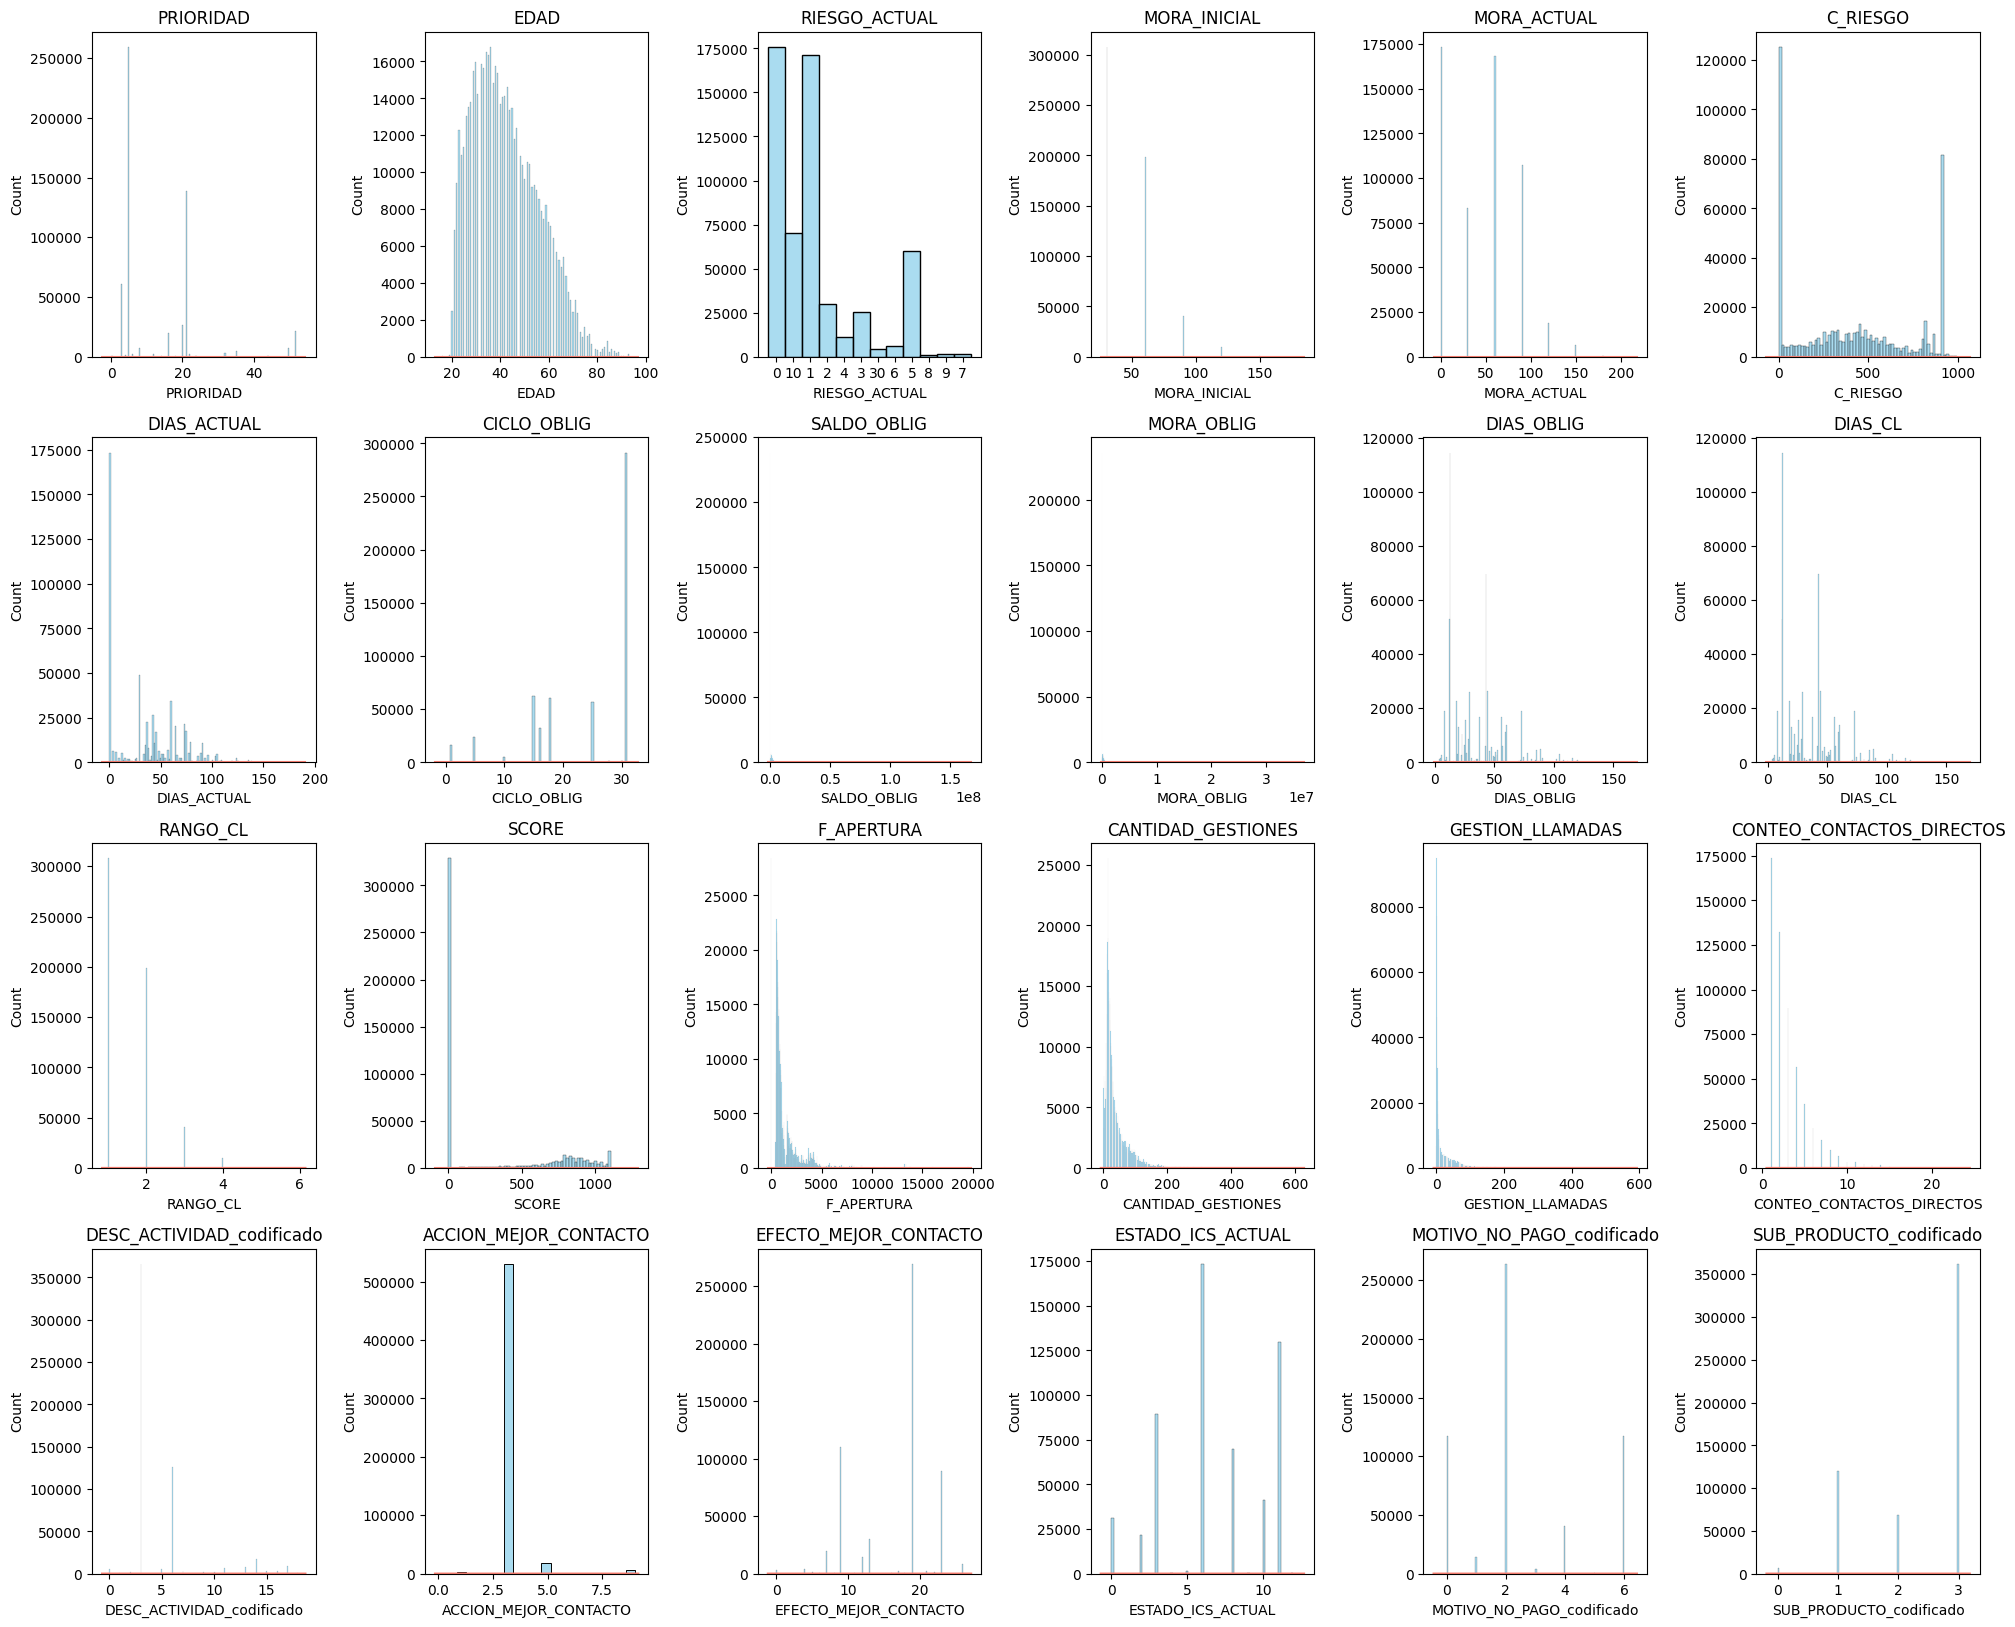

In [ ]:
# Tama√±o del gr√°fico
plt.figure(figsize=(20, 20))

# Iterar sobre cada variable num√©rica
for i, columna in enumerate(df_numericas.columns):
    # Crear un nuevo subplot para cada variable
    plt.subplot(5, 6, i+1)

    # Histograma
    sns.histplot(df_numericas[columna], kde=False, color='skyblue', alpha=0.7)

    # Gr√°fico de Densidad
    if df_numericas[columna].dtype != 'object':  # Verificar si la variable es num√©rica
        sns.kdeplot(df_numericas[columna], color='salmon')

    # Configuraci√≥n del t√≠tulo del subplot
    plt.title(columna)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

### Binning para variables que contienen saldos y asignarles categorias

El binning, tambi√©n conocido como discretizaci√≥n, es el proceso de dividir una variable num√©rica en rangos o categor√≠as discretas. Se utiliza en modelos de machine learning cuando se desea convertir variables num√©ricas en variables categ√≥ricas para diversos fines. Un par de razones de por qu√© necesitamos binning para variables que contienen saldos y asignarles categor√≠as:

- **Reducci√≥n de la complejidad**: En lugar de tratar con valores num√©ricos continuos, el binning reduce la complejidad al agrupar valores similares en categor√≠as discretas. Esto puede hacer que la interpretaci√≥n y el an√°lisis de los datos sean m√°s simples y comprensibles.

- **Manejo de relaciones no lineales**: En muchos casos, la relaci√≥n entre el saldo y otras variables puede no ser lineal. El binning puede capturar mejor estas relaciones no lineales al agrupar valores en rangos que tienen relaciones m√°s uniformes con otras variables.

In [ ]:
# Encontrar el valor m√≠nimo y m√°ximo de la columna SALDO_OBLIG
saldo_min = df['SALDO_OBLIG'].min()
saldo_max = df['SALDO_OBLIG'].max()

# Encontrar el valor m√≠nimo y m√°ximo de la columna MORA_OBLIG
mora_min = df['MORA_OBLIG'].min()
mora_max = df['MORA_OBLIG'].max()

print("Valor m√≠nimo de SALDO_OBLIG:", saldo_min)
print("Valor m√°ximo de SALDO_OBLIG:", saldo_max)
print("Valor m√≠nimo de MORA_OBLIG:", mora_min)
print("Valor m√°ximo de MORA_OBLIG:", mora_max)

Valor m√≠nimo de SALDO_OBLIG: 0.07
Valor m√°ximo de SALDO_OBLIG: 999982.45
Valor m√≠nimo de MORA_OBLIG: 0.0
Valor m√°ximo de MORA_OBLIG: 999999.04


In [ ]:
# Definir los rangos de los bins para SALDO_OBLIG y MORA_OBLIG
rangos_saldo = [0, 100000, 1000000, 3000000, 5000000, 10000000]  # Aumento mon√≥tono
rangos_mora = [0, 100000, 1000000, 3000000, 5000000, 10000000]  # Aumento mon√≥tono

# Discretizar las columnas SALDO_OBLIG y MORA_OBLIG usando los rangos definidos
df_numericas.loc[:, 'SALDO_OBLIG'] = pd.cut(df_numericas['SALDO_OBLIG'], bins=rangos_saldo)
df_numericas.loc[:, 'MORA_OBLIG'] = pd.cut(df_numericas['MORA_OBLIG'], bins=rangos_mora)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar las columnas discretizadas
df_numericas.loc[:, 'SALDO_OBLIG'] = label_encoder.fit_transform(df_numericas['SALDO_OBLIG'])
df_numericas.loc[:, 'MORA_OBLIG'] = label_encoder.fit_transform(df_numericas['MORA_OBLIG'])

# Mostrar las primeras filas del DataFrame con las columnas modificadas
df_numericas[['SALDO_OBLIG', 'MORA_OBLIG']].head()

SALDO_OBLIG  MORA_OBLIG
0            2           1
1            2           1
2            2           1
3            2           1
4            2           1

### Normalizar los valores

Normalizar los valores, tambi√©n conocido como escalamiento de datos, es una t√©cnica fundamental en el aprendizaje autom√°tico y el an√°lisis de datos que consiste en transformar un conjunto de datos a una escala com√∫n. Esto significa ajustar los valores de las variables a un rango espec√≠fico, generalmente entre 0 y 1, o entre -1 y 1.

La normalizaci√≥n de datos juega un papel crucial en el √©xito de los modelos de aprendizaje autom√°tico por varias razones:

- **Mejora la precisi√≥n del modelo**: Los modelos de aprendizaje autom√°tico suelen basarse en algoritmos que son sensibles a la escala de los datos. Al normalizar los valores, se asegura que todas las variables tengan una importancia similar en el proceso de entrenamiento, lo que puede mejorar la precisi√≥n del modelo y evitar que las variables con valores m√°s grandes dominen el aprendizaje.
- **Acelera el entrenamiento del modelo**: Los algoritmos de aprendizaje autom√°tico convergen m√°s r√°pido cuando las variables est√°n normalizadas, lo que reduce el tiempo de entrenamiento y computaci√≥n.
- **Facilita la comparaci√≥n de variables**: Cuando las variables est√°n en diferentes escalas, es dif√≠cil compararlas directamente. La normalizaci√≥n permite comparar las variables de manera justa y evaluar su importancia relativa en el modelo.

In [ ]:
# Crear una instancia del normalizador est√°ndar
scaler = StandardScaler()

# Aplicar la estandarizaci√≥n a tu DataFrame num√©rico
df_numericas_norm_standard = pd.DataFrame(scaler.fit_transform(df_numericas), columns=df_numericas.columns)

### Evaluar distribuciones finales

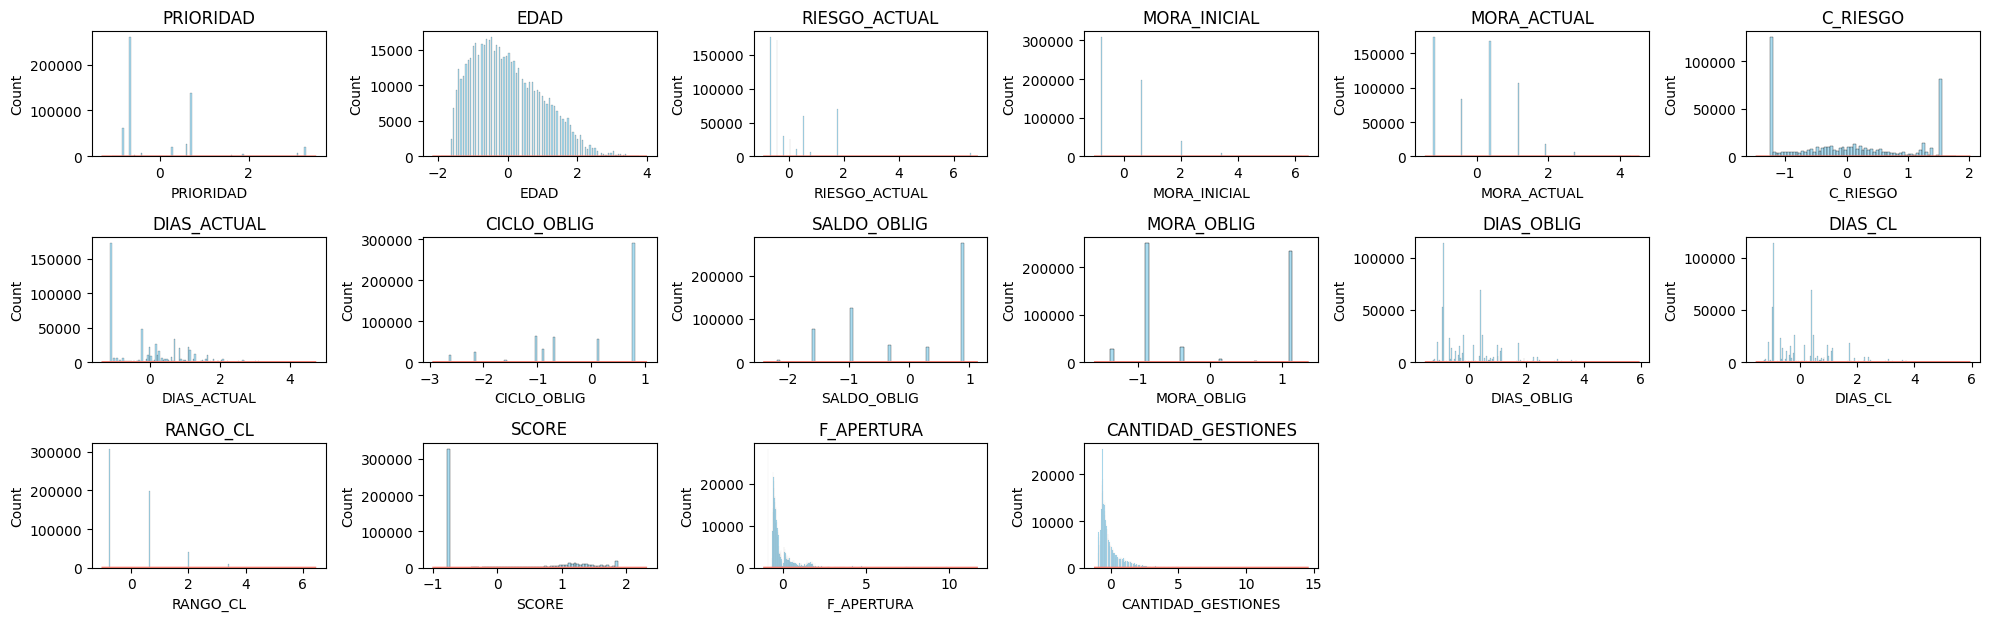

In [ ]:
# Configuraci√≥n del tama√±o de la figura
plt.figure(figsize=(20, 10))

# Obtener el n√∫mero total de columnas en el DataFrame
num_columnas = len(df_numericas_norm_standard.columns)

# Iterar sobre todas las columnas num√©ricas estandarizadas
for i, columna in enumerate(df_numericas_norm_standard.columns):
    # Si hemos alcanzado el l√≠mite m√°ximo de subplots, salimos del bucle
    if i >= 16:
        break

    # Crear un subplot para cada columna
    plt.subplot(5, 6, i + 1)

    # Gr√°fico de Histograma
    sns.histplot(df_numericas_norm_standard[columna], kde=False, color='skyblue', alpha=0.7)

    # Gr√°fico de Densidad
    sns.kdeplot(df_numericas_norm_standard[columna], color='salmon')

    # Configuraci√≥n del t√≠tulo del subplot
    plt.title(columna)

# Ajustar autom√°ticamente la disposici√≥n de los subplots
plt.tight_layout()

# Mostrar los gr√°ficos
plt.show()

### Prueba de normalidad de Shapiro - Wilk

La prueba de normalidad de Shapiro-Wilk se utiliza en estad√≠stica para evaluar si una muestra de datos sigue una distribuci√≥n normal o gaussiana, ya que ayuda a verificar si los datos cumplen con las suposiciones de normalidad requeridas por ciertos modelos y pruebas estad√≠sticas, y tambi√©n puede ayudar a identificar valores at√≠picos en los datos. Esta prueba nos ayuda a identificar los siguientes puntos:

- **Suposiciones de los modelos param√©tricos**: Algunos modelos de machine learning, como la regresi√≥n lineal, asumen que los datos tienen una distribuci√≥n normal. Antes de aplicar estos modelos, es importante verificar si esta suposici√≥n se cumple utilizando pruebas de normalidad como la prueba de Shapiro-Wilk.

- **Selecci√≥n de pruebas estad√≠sticas**: Algunas pruebas estad√≠sticas, como la prueba t de Student o el an√°lisis de varianza (ANOVA), tambi√©n asumen normalidad en los datos. La prueba de Shapiro-Wilk puede ayudar a determinar si es apropiado utilizar estas pruebas en un an√°lisis determinado.

- **Transformaci√≥n de datos**: Si los datos no siguen una distribuci√≥n normal, puede ser necesario aplicar transformaciones a los datos para hacer que se ajusten mejor a esta distribuci√≥n. La prueba de Shapiro-Wilk puede ayudar a identificar la necesidad de tales transformaciones.

- **Identificaci√≥n de valores at√≠picos**: La distribuci√≥n normal es sensible a valores at√≠picos. La prueba de Shapiro-Wilk puede ayudar a detectar si los datos contienen valores extremos que podr√≠an afectar negativamente la validez de los an√°lisis de modelos de machine learning

In [ ]:
from scipy.stats import shapiro

# Crear una lista para almacenar los resultados de la prueba de normalidad
resultados_shapiro = []

# Iterar sobre todas las columnas num√©ricas estandarizadas
for columna in df_numericas_norm_standard.columns:
    # Aplicar la prueba de Shapiro-Wilk
    stat, p_valor = shapiro(df_numericas_norm_standard[columna])

    # Almacenar los resultados en la lista
    resultados_shapiro.append((columna, stat, p_valor))

# Imprimir los resultados
for resultado in resultados_shapiro:
    print("Variable:", resultado[0])
    print("Estad√≠stica de prueba:", resultado[1])
    print("Valor p:", resultado[2])
    print("")

# Interpretar los resultados
alfa = 0.05  # Nivel de significancia
for resultado in resultados_shapiro:
    if resultado[2] > alfa:
        print("No se rechaza la hip√≥tesis nula para la variable", resultado[0], ": los datos parecen seguir una distribuci√≥n normal.")
    else:
        print("Se rechaza la hip√≥tesis nula para la variable", resultado[0], ": los datos no siguen una distribuci√≥n normal.")

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: PRIORIDAD
Estad√≠stica de prueba: 0.7074770331382751
Valor p: 0.0

Variable: EDAD
Estad√≠stica de prueba: 0.9662963151931763
Valor p: 0.0

Variable: RIESGO_ACTUAL
Estad√≠stica de prueba: 0.649579644203186
Valor p: 0.0

Variable: MORA_INICIAL
Estad√≠stica de prueba: 0.7279762625694275
Valor p: 0.0

Variable: MORA_ACTUAL
Estad√≠stica de prueba: 0.8789600729942322
Valor p: 0.0

Variable: C_RIESGO
Estad√≠stica de prueba: 0.8941881656646729
Valor p: 0.0

Variable: DIAS_ACTUAL
Estad√≠stica de prueba: 0.9058278799057007
Valor p: 0.0

Variable: CICLO_OBLIG
Estad√≠stica de prueba: 0.7802556157112122
Valor p: 0.0

Variable: SALDO_OBLIG
Estad√≠stica de prueba: 0.7755340337753296
Valor p: 0.0

Variable: MORA_OBLIG
Estad√≠stica de prueba: 0.7185747027397156
Valor p: 0.0

Variable: DIAS_OBLIG
Estad√≠stica de prueba: 0.8776905536651611
Valor p: 0.0

Variable: DIAS_CL
Estad√≠stica de prueba: 0.8776905536651611
Valor p: 0.0

Variable: RANGO_CL
Estad√≠stica de prueba: 0.7279762625694275
Valor 

### Discusi√≥n de resultados

De acuerdo a los resultados obtenidos en la prueba de normalidad de los datos, surge la pregunta sobre su idoneidad para modelos estad√≠sticos y de aprendizaje autom√°tico basados en supuestos lineales. Es crucial recordar que la normalidad de los datos es un requisito fundamental en muchos contextos, especialmente en modelos lineales como la regresi√≥n lineal, donde garantiza la precisi√≥n de las estimaciones de par√°metros y la validez de los supuestos del modelo.

Sin embargo, en nuestro caso, donde estamos contemplando la implementaci√≥n de un modelo de clasificaci√≥n binaria, como Random Forest u otros (Los cuales validaremos en la siguiente entrega), la discusi√≥n sobre la normalidad de los datos toma un matiz diferente. Mientras que los modelos lineales requieren una distribuci√≥n normal de los datos para su correcta aplicaci√≥n, los modelos de clasificaci√≥n son menos sensibles a este supuesto. De hecho, los modelos de clasificaci√≥n, y espec√≠ficamente los basados en √°rboles de decisi√≥n como Random Forest, son capaces de manejar distribuciones no normales y capturar relaciones no lineales entre las caracter√≠sticas y la variable objetivo de manera efectiva.

Por lo tanto, aunque los resultados de la prueba de normalidad puedan indicar que los datos no siguen una distribuci√≥n normal, esto no impide la construcci√≥n de un modelo de clasificaci√≥n s√≥lido y efectivo. La versatilidad inherente a los modelos de clasificaci√≥n, junto con su capacidad para identificar patrones complejos en los datos, sugiere que son una opci√≥n adecuada para nuestro problema espec√≠fico. De hecho, la robustez de estos modelos ante distribuciones no normales puede incluso representar una ventaja, ya que pueden adaptarse mejor a la complejidad inherente de los datos del mundo real.

# ‚û°Ô∏è **Variables categoricas**

---

Tambi√©n conocidas como variables cualitativas o variables de atributos, son un tipo de variable en estad√≠stica que se utiliza para clasificar o agrupar observaciones en funci√≥n de una caracter√≠stica o atributo com√∫n. A diferencia de las variables cuantitativas, que se miden en una escala num√©rica y pueden tomar valores infinitos o contables, las variables categ√≥ricas solo pueden tomar un n√∫mero finito y predefinido de valores discretos.

- **Valores discretos**: Las variables categ√≥ricas solo pueden tomar un n√∫mero finito y predefinido de valores discretos. Por ejemplo, el g√©nero (masculino, femenino), el color del cabello (negro, casta√±o, rubio), el tipo de sangre (A, B, AB, O) o el estado civil (soltero, casado, viudo, divorciado) son todas variables categ√≥ricas.
- **No tienen orden natural**: Los valores de una variable categ√≥rica no tienen un orden natural o jerarqu√≠a inherente. Por ejemplo, no se puede decir que "masculino" sea mayor o menor que "femenino", o que "negro" sea m√°s oscuro que "casta√±o".
- **Niveles de medici√≥n**: Las variables categ√≥ricas se pueden clasificar en dos niveles de medici√≥n:
- **Nominales**: Las variables nominales tienen valores que no tienen ning√∫n orden o relaci√≥n entre s√≠. Por ejemplo, el g√©nero, el color del cabello o el tipo de sangre son variables nominales.
- **Ordinales**: Las variables ordinales tienen valores que tienen un orden o jerarqu√≠a, pero la diferencia entre los valores no se puede medir num√©ricamente. Por ejemplo, la clasificaci√≥n de una pel√≠cula (mala, regular, buena, excelente) o el nivel de educaci√≥n (primaria, secundaria, universitaria, posgrado) son variables ordinales.

In [ ]:
# Dataframe para variables categ√≥ricas
df_categoricas = features1[['GENERO', 'SEGMENTO_CLIENTE','RECUPERACION','NEGOCIACION_ACTIVA','MARCA_TIPO_CARTERA']]
df_categoricas

GENERO SEGMENTO_CLIENTE RECUPERACION NEGOCIACION_ACTIVA  \
0           F          MONO_TC  NORMALIZADO                 NO   
1           F          MONO_TC  NORMALIZADO                 NO   
2           F          MONO_TC  NORMALIZADO                 NO   
3           F          MONO_TC  NORMALIZADO                 NO   
4           F          MONO_TC  NORMALIZADO                 NO   
...       ...              ...          ...                ...   
557724      M          MONO_TC  NORMALIZADO                 NO   
557725      M          MONO_TC  NORMALIZADO                 NO   
557726      M          MONO_TC   POR_VENCER                 NO   
557727      M          MONO_TC   POR_VENCER                 NO   
557728      M          MONO_TC  NORMALIZADO                 NO   

       MARCA_TIPO_CARTERA  
0                PROD_DIG  
1                PROD_DIG  
2                PROD_DIG  
3                PROD_DIG  
4                PROD_DIG  
...                   ...  
557724           PROD_DIG  
557725           PROD_DIG  
557726                FGA  
557727                FGA  
557728           PROD_DIG  

[557729 rows x 5 columns]

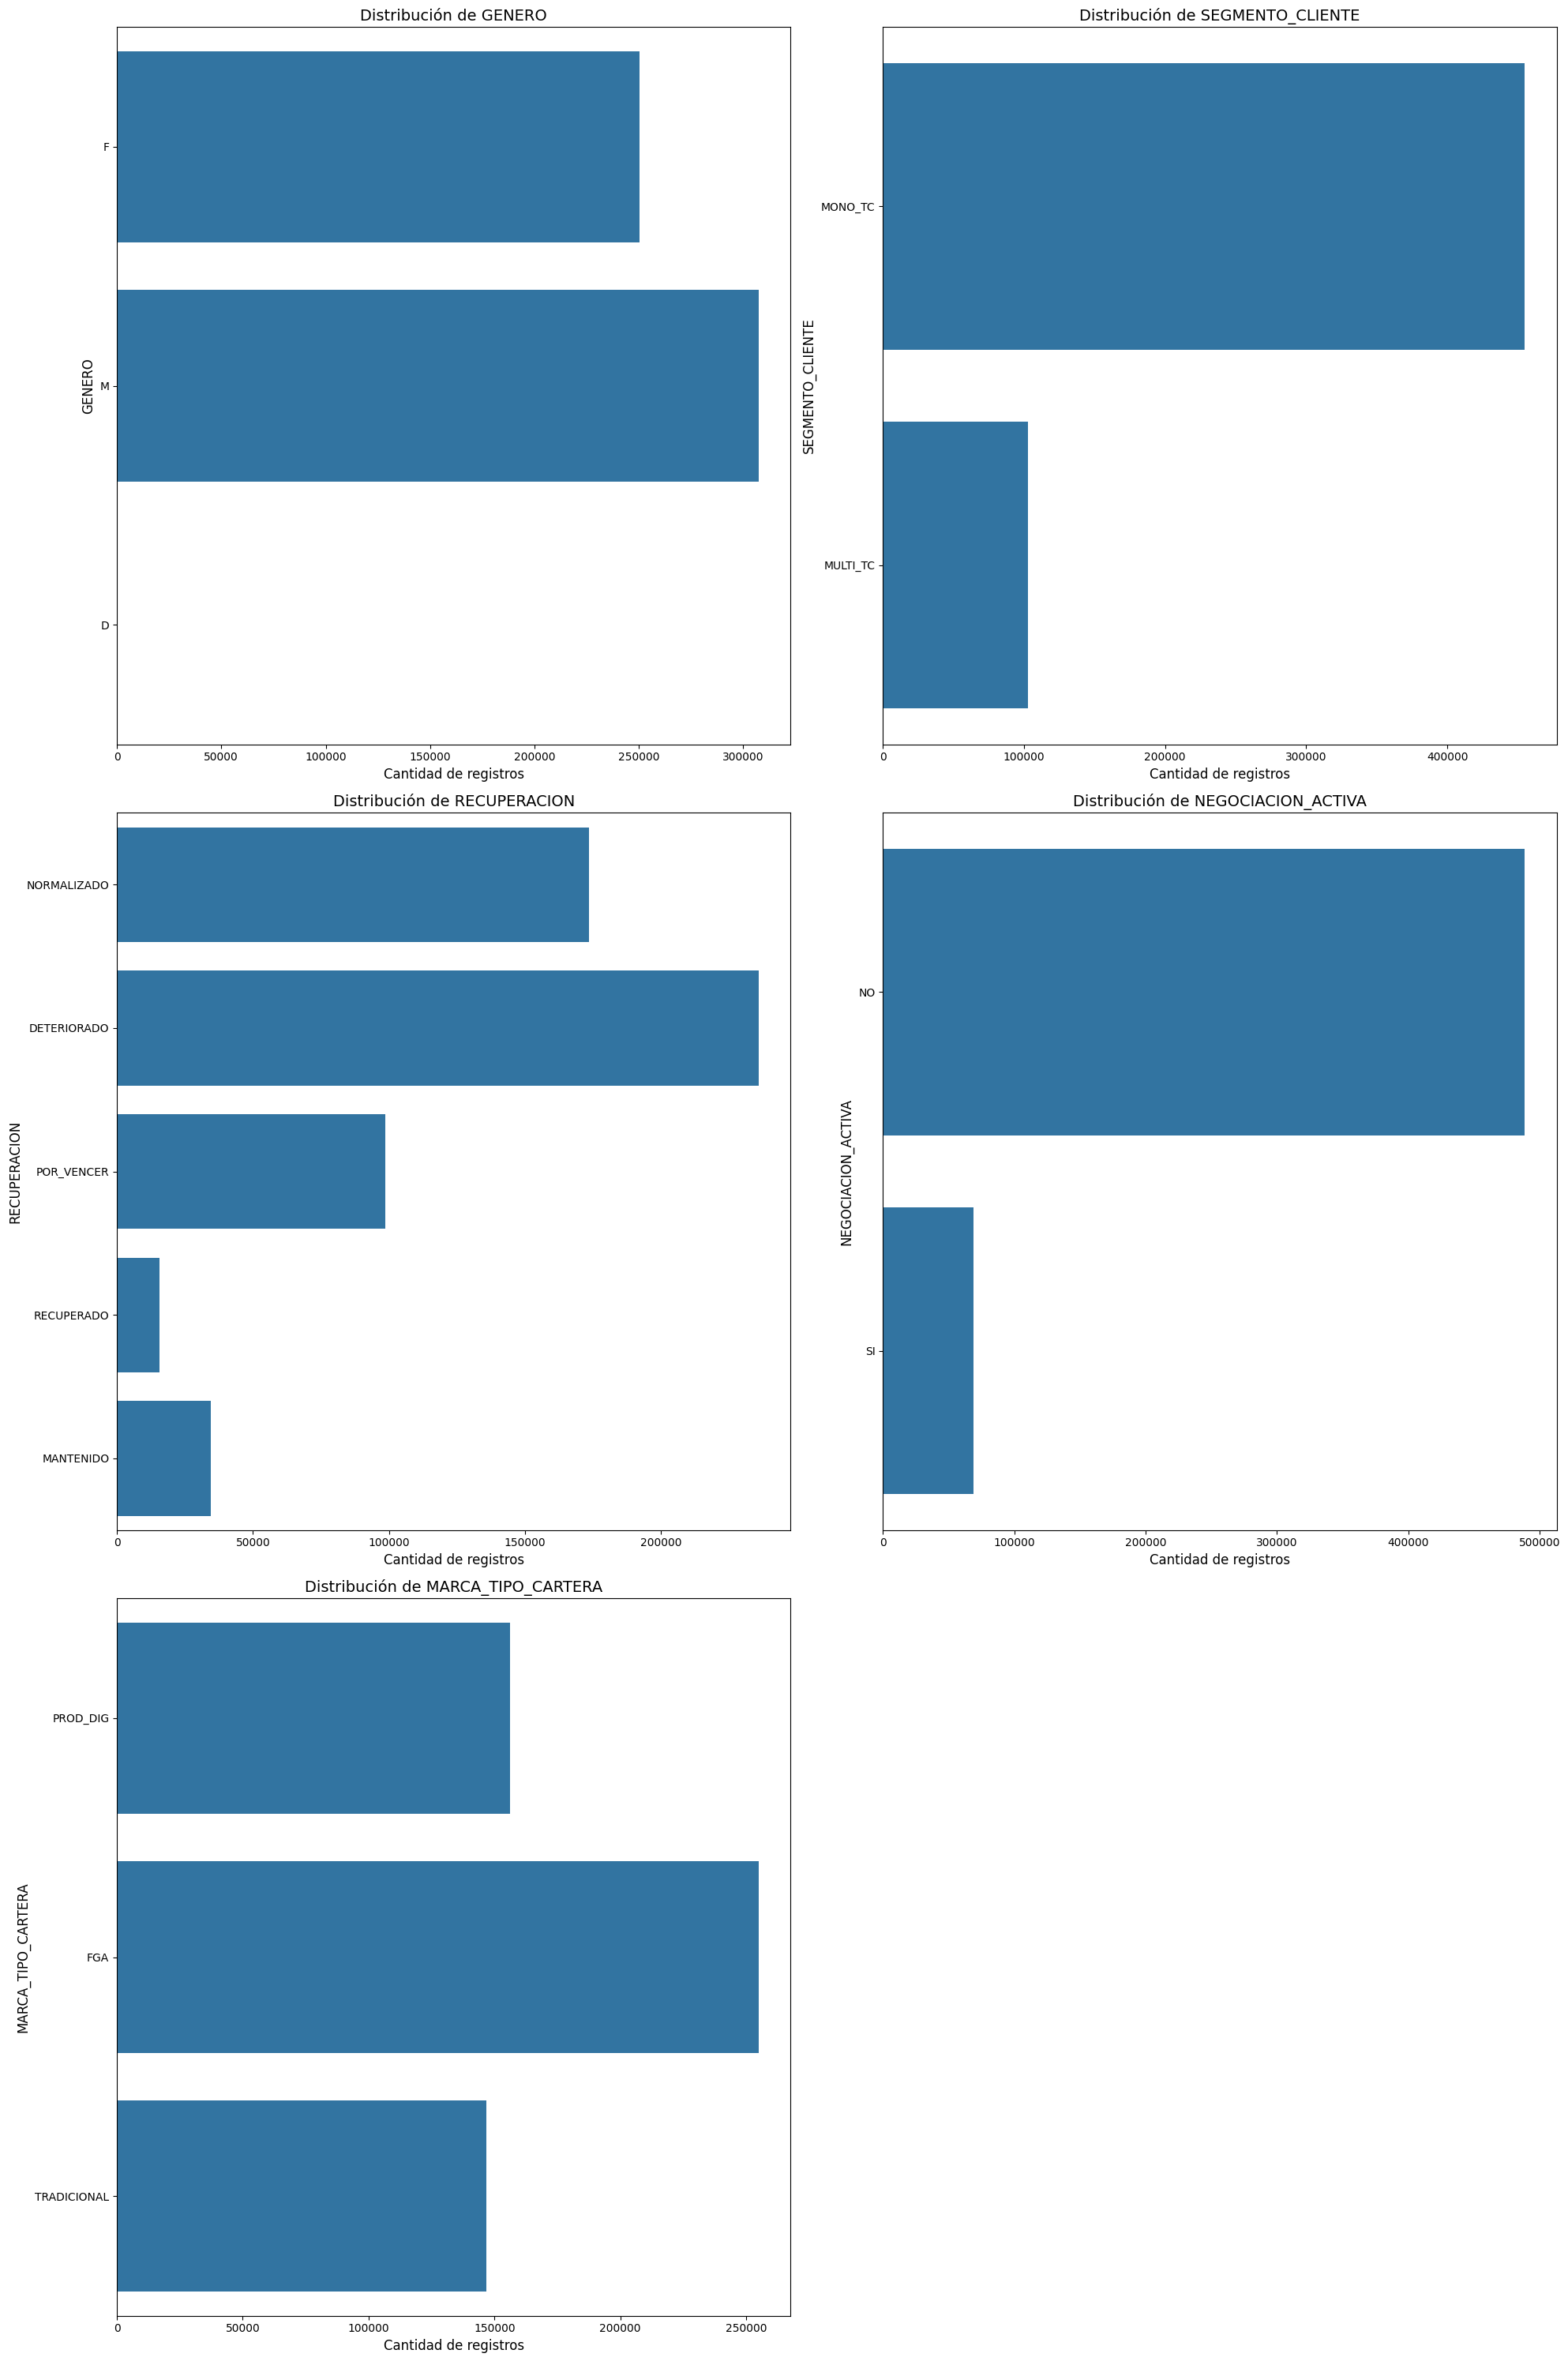

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categ√≥ricas
categorical_variables = ['GENERO', 'SEGMENTO_CLIENTE','RECUPERACION','NEGOCIACION_ACTIVA','MARCA_TIPO_CARTERA']

# Configurar el tama√±o de la figura
plt.figure(figsize=(20, 30))

# Iterar sobre cada variable categ√≥rica
for i, variable in enumerate(categorical_variables, 1):
    # Crear un subplot para cada variable
    plt.subplot(3, 2, i)

    # Gr√°fico de barras para la distribuci√≥n de la variable
    sns.countplot(data=df_categoricas, y=variable)

    # Configurar t√≠tulo y etiquetas
    plt.title(f'Distribuci√≥n de {variable}', fontsize=14)
    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel(variable, fontsize=12)

# Ajustar autom√°ticamente la disposici√≥n de los subplots
plt.tight_layout()

# Mostrar los gr√°ficos
plt.show()

In [ ]:
# Obt√©n las columnas que deseas codificar
columnas_a_codificar = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']

# Aplica la codificaci√≥n one-hot
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=columnas_a_codificar)
df_categoricas_encoded

GENERO_D  GENERO_F  GENERO_M  SEGMENTO_CLIENTE_MONO_TC  \
0          False      True     False                      True   
1          False      True     False                      True   
2          False      True     False                      True   
3          False      True     False                      True   
4          False      True     False                      True   
...          ...       ...       ...                       ...   
557724     False     False      True                      True   
557725     False     False      True                      True   
557726     False     False      True                      True   
557727     False     False      True                      True   
557728     False     False      True                      True   

        SEGMENTO_CLIENTE_MULTI_TC  RECUPERACION_DETERIORADO  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
3                           False                     False   
4                           False                     False   
...                           ...                       ...   
557724                      False                     False   
557725                      False                     False   
557726                      False                     False   
557727                      False                     False   
557728                      False                     False   

        RECUPERACION_MANTENIDO  RECUPERACION_NORMALIZADO  \
0                        False                      True   
1                        False                      True   
2                        False                      True   
3                        False                      True   
4                        False                      True   
...                        ...                       ...   
557724                   False                      True   
557725                   False                      True   
557726                   False                     False   
557727                   False                     False   
557728                   False                      True   

        RECUPERACION_POR_VENCER  RECUPERACION_RECUPERADO  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   
...                         ...                      ...   
557724                    False                    False   
557725                    False                    False   
557726                     True                    False   
557727                     True                    False   
557728                    False                    False   

        NEGOCIACION_ACTIVA_NO  NEGOCIACION_ACTIVA_SI  MARCA_TIPO_CARTERA_FGA  \
0                        True                  False                   False   
1                        True                  False                   False   
2                        True                  False                   False   
3                        True                  False                   False   
4                        True                  False                   False   
...                       ...                    ...                     ...   
557724                   True                  False                   False   
557725                   True                  False                   False   
557726                   True                  False                    True   
557727                   True                  False                    True   
557728                   True                  False                   False   

        MARCA_TIPO_CARTERA_PROD_DIG  MARCA_TIPO_CARTERA

# ‚û°Ô∏è **Variables predictoras**

---

Las variables predictoras, tambi√©n conocidas como variables independientes o variables explicativas, son un tipo de variable en estad√≠stica y aprendizaje autom√°tico que se utiliza para predecir o explicar el valor de otra variable, denominada variable dependiente o variable de respuesta. En otras palabras, las variables predictoras contienen informaci√≥n que se utiliza para modelar la relaci√≥n entre las variables y comprender c√≥mo una variable afecta a otra.
tiene men√∫ contextual

In [ ]:
predictoras.head(5)

HORA  HORA_OK RANGO_HORA RANGO_HORA2
0  15:45:12       15      Tarde       Tarde
1   9:50:27        9     Ma√±ana      Ma√±ana
2   9:49:51        9     Ma√±ana      Ma√±ana
3  10:02:47       10     Ma√±ana      Ma√±ana
4  14:23:01       14      Tarde    Mediodia

....

In [ ]:
# Combinar los DataFrames en uno solo
df = pd.concat([df_categoricas, df_numericas,predictoras['HORA']], axis=1)
df

GENERO SEGMENTO_CLIENTE RECUPERACION NEGOCIACION_ACTIVA  \
0           F          MONO_TC  NORMALIZADO                 NO   
1           F          MONO_TC  NORMALIZADO                 NO   
2           F          MONO_TC  NORMALIZADO                 NO   
3           F          MONO_TC  NORMALIZADO                 NO   
4           F          MONO_TC  NORMALIZADO                 NO   
...       ...              ...          ...                ...   
557724      M          MONO_TC  NORMALIZADO                 NO   
557725      M          MONO_TC  NORMALIZADO                 NO   
557726      M          MONO_TC   POR_VENCER                 NO   
557727      M          MONO_TC   POR_VENCER                 NO   
557728      M          MONO_TC  NORMALIZADO                 NO   

       MARCA_TIPO_CARTERA  PRIORIDAD  EDAD RIESGO_ACTUAL  MORA_INICIAL  \
0                PROD_DIG          5    23             0            30   
1                PROD_DIG          5    23             0            30   
2                PROD_DIG         21    23             0            30   
3                PROD_DIG          5    23             0            30   
4                PROD_DIG          5    23             0            30   
...                   ...        ...   ...           ...           ...   
557724           PROD_DIG         50    54             0            60   
557725           PROD_DIG          5    52             0            30   
557726                FGA          5    41             4            30   
557727                FGA         32    41             4            30   
557728           PROD_DIG         52    43             0            30   

        MORA_ACTUAL  ...  CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 0  ...                   9                 1   
1                 0  ...                   9                 1   
2                 0  ...                   9                 1   
3                 0  ...                   9                 1   
4                 0  ...                   9                 1   
...             ...  ...                 ...               ...   
557724            0  ...                  66                46   
557725            0  ...                  25                19   
557726           30  ...                  10                 2   
557727           30  ...                  10                 2   
557728            0  ...                  12                 4   

        CONTEO_CONTACTOS_DIRECTOS  DESC_ACTIVIDAD_codificado  \
0                               1                          3   
1                               1                          3   
2                               1                          3   
3                               1                          3   
4                               1                          3   
...                           ...                        ...   
557724                          9                          6   
557725                          4                          3   
557726                          2                          3   
557727                          2                          3   
557728                          4                          3   

        ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  ESTADO_ICS_ACTUAL  \
0                           3                     26                  6   
1                           3                     26                  6   
2                           3                     26                  6   
3                           3                     26                  6   
4                           3                     26                  6   
...                       ...                    ...                ...   
557724                      3                     23                  6   
557725                      3                     19                  6   
557726                      3                     19                  3   
557727       

In [ ]:
# Combinar los DataFrames en uno solo
df1 = pd.concat([df_categoricas, df_numericas,predictoras['HORA_OK']], axis=1)
df1

GENERO SEGMENTO_CLIENTE RECUPERACION NEGOCIACION_ACTIVA  \
0           F          MONO_TC  NORMALIZADO                 NO   
1           F          MONO_TC  NORMALIZADO                 NO   
2           F          MONO_TC  NORMALIZADO                 NO   
3           F          MONO_TC  NORMALIZADO                 NO   
4           F          MONO_TC  NORMALIZADO                 NO   
...       ...              ...          ...                ...   
557724      M          MONO_TC  NORMALIZADO                 NO   
557725      M          MONO_TC  NORMALIZADO                 NO   
557726      M          MONO_TC   POR_VENCER                 NO   
557727      M          MONO_TC   POR_VENCER                 NO   
557728      M          MONO_TC  NORMALIZADO                 NO   

       MARCA_TIPO_CARTERA  PRIORIDAD  EDAD RIESGO_ACTUAL  MORA_INICIAL  \
0                PROD_DIG          5    23             0            30   
1                PROD_DIG          5    23             0            30   
2                PROD_DIG         21    23             0            30   
3                PROD_DIG          5    23             0            30   
4                PROD_DIG          5    23             0            30   
...                   ...        ...   ...           ...           ...   
557724           PROD_DIG         50    54             0            60   
557725           PROD_DIG          5    52             0            30   
557726                FGA          5    41             4            30   
557727                FGA         32    41             4            30   
557728           PROD_DIG         52    43             0            30   

        MORA_ACTUAL  ...  CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 0  ...                   9                 1   
1                 0  ...                   9                 1   
2                 0  ...                   9                 1   
3                 0  ...                   9                 1   
4                 0  ...                   9                 1   
...             ...  ...                 ...               ...   
557724            0  ...                  66                46   
557725            0  ...                  25                19   
557726           30  ...                  10                 2   
557727           30  ...                  10                 2   
557728            0  ...                  12                 4   

        CONTEO_CONTACTOS_DIRECTOS  DESC_ACTIVIDAD_codificado  \
0                               1                          3   
1                               1                          3   
2                               1                          3   
3                               1                          3   
4                               1                          3   
...                           ...                        ...   
557724                          9                          6   
557725                          4                          3   
557726                          2                          3   
557727                          2                          3   
557728                          4                          3   

        ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  ESTADO_ICS_ACTUAL  \
0                           3                     26                  6   
1                           3                     26                  6   
2                           3                     26                  6   
3                           3                     26                  6   
4                           3                     26                  6   
...                       ...                    ...                ...   
557724                      3                     23                  6   
557725                      3                     19                  6   
557726                      3                     19                  3   
557727       

In [ ]:
# Combinar los DataFrames en uno solo
df2 = pd.concat([df_categoricas, df_numericas,predictoras['RANGO_HORA']], axis=1)
df2

GENERO SEGMENTO_CLIENTE RECUPERACION NEGOCIACION_ACTIVA  \
0           F          MONO_TC  NORMALIZADO                 NO   
1           F          MONO_TC  NORMALIZADO                 NO   
2           F          MONO_TC  NORMALIZADO                 NO   
3           F          MONO_TC  NORMALIZADO                 NO   
4           F          MONO_TC  NORMALIZADO                 NO   
...       ...              ...          ...                ...   
557724      M          MONO_TC  NORMALIZADO                 NO   
557725      M          MONO_TC  NORMALIZADO                 NO   
557726      M          MONO_TC   POR_VENCER                 NO   
557727      M          MONO_TC   POR_VENCER                 NO   
557728      M          MONO_TC  NORMALIZADO                 NO   

       MARCA_TIPO_CARTERA  PRIORIDAD  EDAD RIESGO_ACTUAL  MORA_INICIAL  \
0                PROD_DIG          5    23             0            30   
1                PROD_DIG          5    23             0            30   
2                PROD_DIG         21    23             0            30   
3                PROD_DIG          5    23             0            30   
4                PROD_DIG          5    23             0            30   
...                   ...        ...   ...           ...           ...   
557724           PROD_DIG         50    54             0            60   
557725           PROD_DIG          5    52             0            30   
557726                FGA          5    41             4            30   
557727                FGA         32    41             4            30   
557728           PROD_DIG         52    43             0            30   

        MORA_ACTUAL  ...  CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 0  ...                   9                 1   
1                 0  ...                   9                 1   
2                 0  ...                   9                 1   
3                 0  ...                   9                 1   
4                 0  ...                   9                 1   
...             ...  ...                 ...               ...   
557724            0  ...                  66                46   
557725            0  ...                  25                19   
557726           30  ...                  10                 2   
557727           30  ...                  10                 2   
557728            0  ...                  12                 4   

        CONTEO_CONTACTOS_DIRECTOS  DESC_ACTIVIDAD_codificado  \
0                               1                          3   
1                               1                          3   
2                               1                          3   
3                               1                          3   
4                               1                          3   
...                           ...                        ...   
557724                          9                          6   
557725                          4                          3   
557726                          2                          3   
557727                          2                          3   
557728                          4                          3   

        ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  ESTADO_ICS_ACTUAL  \
0                           3                     26                  6   
1                           3                     26                  6   
2                           3                     26                  6   
3                           3                     26                  6   
4                           3                     26                  6   
...                       ...                    ...                ...   
557724                      3                     23                  6   
557725                      3                     19                  6   
557726                      3                     19                  3   
557727       

In [ ]:
df2.to_csv("prueba.csv",encoding="latin-1")

In [ ]:
# Combinar los DataFrames en uno solo
df3 = pd.concat([df_categoricas, df_numericas,predictoras['RANGO_HORA2']], axis=1)
df3

GENERO SEGMENTO_CLIENTE RECUPERACION NEGOCIACION_ACTIVA  \
0           F          MONO_TC  NORMALIZADO                 NO   
1           F          MONO_TC  NORMALIZADO                 NO   
2           F          MONO_TC  NORMALIZADO                 NO   
3           F          MONO_TC  NORMALIZADO                 NO   
4           F          MONO_TC  NORMALIZADO                 NO   
...       ...              ...          ...                ...   
557724      M          MONO_TC  NORMALIZADO                 NO   
557725      M          MONO_TC  NORMALIZADO                 NO   
557726      M          MONO_TC   POR_VENCER                 NO   
557727      M          MONO_TC   POR_VENCER                 NO   
557728      M          MONO_TC  NORMALIZADO                 NO   

       MARCA_TIPO_CARTERA  PRIORIDAD  EDAD RIESGO_ACTUAL  MORA_INICIAL  \
0                PROD_DIG          5    23             0            30   
1                PROD_DIG          5    23             0            30   
2                PROD_DIG         21    23             0            30   
3                PROD_DIG          5    23             0            30   
4                PROD_DIG          5    23             0            30   
...                   ...        ...   ...           ...           ...   
557724           PROD_DIG         50    54             0            60   
557725           PROD_DIG          5    52             0            30   
557726                FGA          5    41             4            30   
557727                FGA         32    41             4            30   
557728           PROD_DIG         52    43             0            30   

        MORA_ACTUAL  ...  CANTIDAD_GESTIONES  GESTION_LLAMADAS  \
0                 0  ...                   9                 1   
1                 0  ...                   9                 1   
2                 0  ...                   9                 1   
3                 0  ...                   9                 1   
4                 0  ...                   9                 1   
...             ...  ...                 ...               ...   
557724            0  ...                  66                46   
557725            0  ...                  25                19   
557726           30  ...                  10                 2   
557727           30  ...                  10                 2   
557728            0  ...                  12                 4   

        CONTEO_CONTACTOS_DIRECTOS  DESC_ACTIVIDAD_codificado  \
0                               1                          3   
1                               1                          3   
2                               1                          3   
3                               1                          3   
4                               1                          3   
...                           ...                        ...   
557724                          9                          6   
557725                          4                          3   
557726                          2                          3   
557727                          2                          3   
557728                          4                          3   

        ACCION_MEJOR_CONTACTO  EFECTO_MEJOR_CONTACTO  ESTADO_ICS_ACTUAL  \
0                           3                     26                  6   
1                           3                     26                  6   
2                           3                     26                  6   
3                           3                     26                  6   
4                           3                     26                  6   
...                       ...                    ...                ...   
557724                      3                     23                  6   
557725                      3                     19                  6   
557726                      3                     19                  3   
557727       

## Filtrado para seleccion de caracteristicas

Vamos a convertir todas las variables categ√≥ricas en el DataFrame **df2** en variables num√©ricas utilizando **LabelEncoder**, lo que facilita su uso en modelos de machine learning que requieren variables num√©ricas como entrada

In [ ]:
le = LabelEncoder()
df_encoded = df2.copy()  # Hacer una copia del DataFrame original
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

## Umbral de varianza

El umbral de varianza, tambi√©n conocido como filtro de varianza, es un par√°metro utilizado en t√©cnicas de selecci√≥n de caracter√≠sticas en el aprendizaje autom√°tico y la miner√≠a de datos. Su funci√≥n principal es eliminar las caracter√≠sticas que no aportan informaci√≥n significativa al modelo, es decir, aquellas que tienen una varianza muy baja.


In [ ]:
# Umbral de varianza
def apply_variance_threshold(df, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(df)
    return df[df.columns[selector.get_support(indices=True)]]

df2_filtered_variance = apply_variance_threshold(df2, threshold=0.1)
df2_filtered_variance

ValueError: could not convert string to float: 'F'

In [ ]:
# Codificar variables categ√≥ricas si es necesario
# Esto es necesario para algunas t√©cnicas, como el an√°lisis factorial
# Si todas tus variables son num√©ricas, este paso puede omitirse
le = LabelEncoder()
df_encoded = df2.copy()  # Hacer una copia del DataFrame original
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Umbral de varianza
def apply_variance_threshold(df, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(df)
    return df[df.columns[selector.get_support(indices=True)]]

df_filtered_variance = apply_variance_threshold(df_encoded, threshold=0.1)

# Correlaci√≥n
correlation_matrix = df_encoded.corr()

# Chi-cuadrado
def apply_chi2(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    chi2_scores, p_values = chi2(X, y)
    chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
    return chi2_results

target_column = 'RANGO_HORA'  # Reemplaza 'TARGET_VARIABLE' con el nombre de tu variable objetivo
chi2_results = apply_chi2(df_encoded, target_column)

# ANOVA
def apply_anova(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    f_scores, p_values = f_classif(X, y)
    anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})
    return anova_results

anova_results = apply_anova(df_encoded, target_column)

# An√°lisis de Componentes Principales (PCA)
def apply_pca(df, n_components=None):
    pca = PCA(n_components)
    pca.fit(df)
    return pca

n_components_pca = 10  # N√∫mero de componentes principales
pca = apply_pca(df_encoded, n_components_pca)
pca_components = pca.components_

# An√°lisis Factorial (FA)
def apply_factor_analysis(df, n_components=None):
    fa = FactorAnalysis(n_components)
    fa.fit(df)
    return fa

n_components_fa = 5  # N√∫mero de componentes para el an√°lisis factorial
fa = apply_factor_analysis(df_encoded, n_components_fa)
fa_components = fa.components_

### Matriz de correlacion

es una herramienta que nos ayuda a entender las relaciones entre las diferentes variables de entrada o caracter√≠sticas (features) en nuestro conjunto de datos. Esta matriz nos proporciona informaci√≥n sobre la fuerza y la direcci√≥n de las relaciones lineales entre las variables y es √∫til para:

- **Identificar relaciones lineales**: La matriz de correlaci√≥n nos ayuda a identificar si hay relaciones lineales entre las variables. Esto es importante porque algunos algoritmos de machine learning, como la regresi√≥n lineal, asumen que las variables est√°n linealmente relacionadas.

- **Selecci√≥n de caracter√≠sticas**: Podemos usar la matriz de correlaci√≥n para identificar caracter√≠sticas que est√©n altamente correlacionadas entre s√≠. Esto puede ser √∫til en tareas de selecci√≥n de caracter√≠sticas, donde queremos eliminar caracter√≠sticas redundantes para simplificar el modelo y reducir el riesgo de sobreajuste.

- **Entender la importancia de las caracter√≠sticas**: Las caracter√≠sticas con alta correlaci√≥n con la variable objetivo pueden ser importantes predictores en el modelo. La matriz de correlaci√≥n nos ayuda a identificar estas caracter√≠sticas importantes y a priorizarlas en nuestro an√°lisis.

- **Detectar multicolinealidad**: La multicolinealidad es una situaci√≥n en la que dos o m√°s variables predictoras est√°n altamente correlacionadas entre s√≠. Esto puede causar problemas en algunos modelos de machine learning, como la regresi√≥n lineal, donde puede hacer que los coeficientes sean dif√≠ciles de interpretar. La matriz de correlaci√≥n nos ayuda a detectar la presencia de multicolinealidad en los datos.

In [ ]:
correlation_matrix

GENERO  SEGMENTO_CLIENTE  RECUPERACION  \
GENERO                     1.000000          0.058616     -0.031072   
SEGMENTO_CLIENTE           0.058616          1.000000     -0.085361   
RECUPERACION              -0.031072         -0.085361      1.000000   
NEGOCIACION_ACTIVA         0.013926          0.223475     -0.079895   
MARCA_TIPO_CARTERA         0.011914          0.093978     -0.099710   
PRIORIDAD                 -0.017228         -0.044024     -0.056745   
EDAD                       0.005602          0.013521     -0.023532   
RIESGO_ACTUAL              0.023868          0.207941     -0.203822   
MORA_INICIAL               0.042387          0.478532      0.008657   
MORA_ACTUAL                0.050053          0.405901     -0.577460   
C_RIESGO                  -0.005553         -0.023179     -0.020151   
DIAS_ACTUAL                0.049734          0.372779     -0.464487   
CICLO_OBLIG               -0.031713         -0.495572      0.323758   
SALDO_OBLIG                0.008612         -0.066319     -0.233446   
MORA_OBLIG                -0.013088         -0.334996     -0.168835   
DIAS_OBLIG                 0.047190          0.501747     -0.088340   
DIAS_CL                    0.047190          0.501747     -0.088340   
RANGO_CL                   0.042387          0.478532      0.008657   
SCORE                      0.018590          0.121004     -0.105546   
F_APERTURA                -0.015715         -0.058403     -0.077746   
CANTIDAD_GESTIONES        -0.003603         -0.111894     -0.323173   
GESTION_LLAMADAS          -0.014775         -0.253720     -0.268919   
CONTEO_CONTACTOS_DIRECTOS  0.021912         -0.025101     -0.197154   
DESC_ACTIVIDAD_codificado  0.008148         -0.037175     -0.002145   
ACCION_MEJOR_CONTACTO     -0.007565          0.036499      0.030298   
EFECTO_MEJOR_CONTACTO      0.008007         -0.049412      0.165272   
ESTADO_ICS_ACTUAL          0.011561          0.063715     -0.046639   
MOTIVO_NO_PAGO_codificado  0.012193          0.032460      0.012534   
SUB_PRODUCTO_codificado   -0.004032         -0.219939      0.054448   
RANGO_HORA                -0.003290          0.011464      0.002269   

                           NEGOCIACION_ACTIVA  MARCA_TIPO_CARTERA  PRIORIDAD  \
GENERO                               0.013926            0.011914  -0.017228   
SEGMENTO_CLIENTE                     0.223475            0.093978  -0.044024   
RECUPERACION                        -0.079895           -0.099710  -0.056745   
NEGOCIACION_ACTIVA                   1.000000            0.086255  -0.023964   
MARCA_TIPO_CARTERA                   0.086255            1.000000   0.012999   
PRIORIDAD                           -0.023964            0.012999   1.000000   
EDAD                                 0.025543            0.297045   0.020642   
RIESGO_ACTUAL                        0.139261            0.267056   0.030180   
MORA_INICIAL                         0.175511            0.015292   0.030143   
MORA_ACTUAL                          0.199017            0.033026   0.065484   
C_RIESGO                             0.055273            0.460768  -0.024260   
DIAS_ACTUAL                          0.192856            0.014997   0.068207   
CICLO_OBLIG                         -0.157190           -0.373920   0.018037   
SALDO_OBLIG                          0.020647            0.166684   0.019173   
MORA_OBLIG                          -0.066503           -0.019193   0.022581   
DIAS_OBLIG                           0.195671            0.094573   0.028413   
DIAS_CL                              0.195671            0.094573   0.028413   
RANGO_CL                             0.175511            0.015292   0.030143   
SCORE                                0.125687            0.618344   0.007513   
F_APERTURA                           0.043554            0.583999   0.003998   
CANTIDAD_GESTIONES                   0.028722            0.070516   0.117685   
GESTION_LLAMADAS                    -0.021507            0.059502  

### Chi 2

**Feature**: Esta columna muestra el nombre de la caracter√≠stica o variable analizada.

**Chi2 Score**: Este es el valor del estad√≠stico chi-cuadrado calculado para cada caracter√≠stica. Cuanto mayor sea este valor, mayor es la dependencia entre la variable y la variable objetivo.

**P-value**: Este valor indica la probabilidad de observar los datos si la hip√≥tesis nula de independencia entre la variable y la variable objetivo fuera verdadera. Un valor de p bajo (generalmente por debajo de 0.05) sugiere que la caracter√≠stica es significativa para predecir la variable objetivo.

Ahora, veamos algunos detalles destacados de estos resultados:

**SEGMENTO_CLIENTE**: Tiene un alto Chi2 Score y un p-value muy bajo, lo que sugiere que esta caracter√≠stica es altamente significativa para predecir la variable objetivo.

**PRIORIDAD, C_RIESGO**, **F_APERTURA**, **CANTIDAD_GESTIONES**, **GESTION_LLAMADAS**, y **CONTEO_CONTACTOS_DIRECTOS**: Todas estas caracter√≠sticas tienen un Chi2 Score muy alto y un p-value de 0, lo que indica que son altamente significativas para predecir la variable objetivo.

**GENERO, RECUPERACION, NEGOCIACION_ACTIVA, MORA_INICIAL, RIESGO_ACTUAL, SALDO_OBLIG, DIAS_OBLIG, DIAS_CL, y MOTIVO_NO_PAGO_codificado**: Estas caracter√≠sticas tienen **Chi2 Scores** m√°s bajos y **p-values** m√°s altos, lo que sugiere que tienen una menor influencia en la variable objetivo en comparaci√≥n con las caracter√≠sticas mencionadas anteriormente.

In [ ]:
chi2_results

Feature    Chi2 Score        P-value
0                      GENERO      0.963191   3.263841e-01
1            SEGMENTO_CLIENTE     59.769835   1.066252e-14
2                RECUPERACION      3.437154   6.374543e-02
3          NEGOCIACION_ACTIVA      0.293566   5.879442e-01
4          MARCA_TIPO_CARTERA      4.406944   3.579290e-02
5                   PRIORIDAD   2019.354393   0.000000e+00
6                        EDAD    679.180175  1.007417e-149
7               RIESGO_ACTUAL      1.766863   1.837708e-01
8                MORA_INICIAL      0.640368   4.235777e-01
9                 MORA_ACTUAL     73.291554   1.118455e-17
10                   C_RIESGO   4891.293895   0.000000e+00
11                DIAS_ACTUAL     88.968229   4.012045e-21
12                CICLO_OBLIG     25.731294   3.924121e-07
13                SALDO_OBLIG      1.744363   1.865870e-01
14                 MORA_OBLIG     21.543450   3.459021e-06
15                 DIAS_OBLIG     27.707006   1.411506e-07
16                    DIAS_CL     27.707006   1.411506e-07
17                   RANGO_CL      0.021346   8.838414e-01
18                      SCORE    277.542851   2.576675e-62
19                 F_APERTURA  57899.290428   0.000000e+00
20         CANTIDAD_GESTIONES   1876.660056   0.000000e+00
21           GESTION_LLAMADAS   2059.205211   0.000000e+00
22  CONTEO_CONTACTOS_DIRECTOS    507.685088  2.022439e-112
23  DESC_ACTIVIDAD_codificado     55.379838   9.935028e-14
24      ACCION_MEJOR_CONTACTO     11.864858   5.720315e-04
25      EFECTO_MEJOR_CONTACTO      0.300719   5.834321e-01
26          ESTADO_ICS_ACTUAL     11.335230   7.605041e-04
27  MOTIVO_NO_PAGO_codificado      2.495884   1.141443e-01
28    SUB_PRODUCTO_codificado      0.262738   6.082456e-01

### ANOVA

**Feature**: El nombre de la caracter√≠stica o variable analizada.

**F-score**: Este es el valor del estad√≠stico F calculado para cada caracter√≠stica. El **F-score** compara la varianza entre grupos con la varianza dentro de los grupos. Un valor alto indica que las medias de los grupos son diferentes.

**P-value**: Este valor indica la probabilidad de observar los datos si la hip√≥tesis nula de que no hay diferencia entre las medias de los grupos fuera verdadera. Un valor de **p** bajo (generalmente por debajo de 0.05) sugiere que la caracter√≠stica es significativa para predecir la variable objetivo.

Ahora, algunas observaciones sobre estos resultados:

**SEGMENTO_CLIENTE**: Tiene un alto **F-score** y un **p-value** muy bajo, lo que sugiere que esta caracter√≠stica es altamente significativa para predecir la variable objetivo.

**PRIORIDAD, EDAD, C_RIESGO, F_APERTURA, CANTIDAD_GESTIONES, GESTION_LLAMADAS y CONTEO_CONTACTOS_DIRECTOS**: Todas estas caracter√≠sticas tienen **F-scores** altos y **p-values** muy bajos, lo que indica que son altamente significativas para predecir la variable objetivo.

**GENERO, MARCA_TIPO_CARTERA, CICLO_OBLIG, MORA_OBLIG, y ACCION_MEJOR_CONTACTO**: Estas caracter√≠sticas tambi√©n tienen **p-values** bajos, aunque sus **F-scores** son relativamente m√°s bajos, lo que sugiere que son significativas pero tal vez no tan influyentes como las mencionadas anteriormente.

**NEGOCIACION_ACTIVA, RIESGO_ACTUAL, MORA_INICIAL, MORA_ACTUAL, DIAS_ACTUAL, SALDO_OBLIG, DIAS_OBLIG, DIAS_CL, RANGO_CL, SCORE, EFECTO_MEJOR_CONTACTO, ESTADO_ICS_ACTUAL, MOTIVO_NO_PAGO_codificado, y SUB_PRODUCTO_codificado**: Estas caracter√≠sticas tienen **F-scores** m√°s bajos y **p-values** m√°s altos, lo que sugiere que tienen una menor influencia en la variable objetivo en comparaci√≥n con las caracter√≠sticas mencionadas anteriormente.

In [ ]:
anova_results

Feature     F-score       P-value
0                      GENERO    6.037981  1.400159e-02
1            SEGMENTO_CLIENTE   73.312749  1.109250e-17
2                RECUPERACION    2.871287  9.017329e-02
3          NEGOCIACION_ACTIVA    0.335119  5.626603e-01
4          MARCA_TIPO_CARTERA    5.205243  2.251924e-02
5                   PRIORIDAD  181.216314  2.668801e-41
6                        EDAD  153.340226  3.262523e-35
7               RIESGO_ACTUAL    0.612779  4.337436e-01
8                MORA_INICIAL    0.065266  7.983589e-01
9                 MORA_ACTUAL    2.319948  1.277249e-01
10                   C_RIESGO   18.629786  1.587485e-05
11                DIAS_ACTUAL    3.089242  7.881207e-02
12                CICLO_OBLIG    7.938846  4.838638e-03
13                SALDO_OBLIG    2.357305  1.246980e-01
14                 MORA_OBLIG   14.929209  1.116340e-04
15                 DIAS_OBLIG    1.751584  1.856783e-01
16                    DIAS_CL    1.751584  1.856783e-01
17                   RANGO_CL    0.065266  7.983589e-01
18                      SCORE    0.522664  4.697078e-01
19                 F_APERTURA   32.907901  9.667947e-09
20         CANTIDAD_GESTIONES   44.824222  2.157426e-11
21           GESTION_LLAMADAS   35.171430  3.020975e-09
22  CONTEO_CONTACTOS_DIRECTOS  251.377135  1.338476e-56
23  DESC_ACTIVIDAD_codificado   24.404590  7.810495e-07
24      ACCION_MEJOR_CONTACTO   70.835376  3.892101e-17
25      EFECTO_MEJOR_CONTACTO    0.166285  6.834350e-01
26          ESTADO_ICS_ACTUAL    6.930947  8.471913e-03
27  MOTIVO_NO_PAGO_codificado    1.504239  2.200207e-01
28    SUB_PRODUCTO_codificado    0.849582  3.566712e-01

### PCA

El An√°lisis de Componentes Principales (ACP), tambi√©n conocido como Principal Component Analysis (PCA) en ingl√©s, es una t√©cnica estad√≠stica multivariante utilizada para reducir la dimensionalidad de un conjunto de datos mientras se conserva la m√°xima cantidad de informaci√≥n posible. En otras palabras, el PCA permite transformar un conjunto de datos con muchas variables correlacionadas en un conjunto de nuevas variables no correlacionadas, llamadas componentes principales, que capturan la mayor parte de la variabilidad de los datos originales.

C√≥mo funciona el PCA?
- **Estandarizaci√≥n de los datos**: Se estandarizan los datos rest√°ndoles la media y dividi√©ndolos por la desviaci√≥n est√°ndar de cada variable. Esto asegura que todas las variables tengan la misma escala y no afecten el proceso de c√°lculo de los componentes principales.
- **C√°lculo de la matriz de covarianzas**: Se calcula la matriz de covarianzas, que representa la relaci√≥n lineal entre las variables. Cada elemento de la matriz representa la covarianza entre dos variables espec√≠ficas.
- **Descomposici√≥n en valores propios y vectores propios**: Se descompone la matriz de covarianzas en una matriz de valores propios y una matriz de vectores propios. Los valores propios representan la varianza capturada por cada componente principal, mientras que los vectores propios representan la direcci√≥n de cada componente principal en el espacio original de las variables.
- **Selecci√≥n de componentes principales**: Se seleccionan los componentes principales que capturan la mayor cantidad de varianza total del conjunto de datos. Esto generalmente se realiza ordenando los valores propios de mayor a menor y seleccionando los componentes principales que acumulan un porcentaje significativo de la varianza total (por ejemplo, el 90%).
- **Transformaci√≥n de los datos**: Se transforman los datos originales en las nuevas variables de los componentes principales. Esto implica multiplicar la matriz de datos estandarizados por la matriz de vectores propios seleccionados.

In [ ]:
n_components_pca = 10  # N√∫mero de componentes principales
pca = apply_pca(df_encoded, n_components_pca)
pca_components = pca.components_

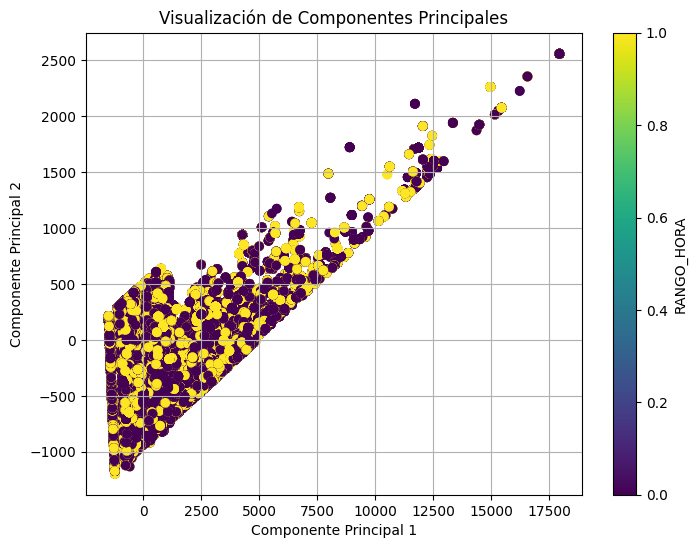

In [ ]:
pca_transformed = pca.transform(df_encoded)

# Grafica los datos en un gr√°fico de dispersi√≥n
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=df_encoded['RANGO_HORA'], cmap='viridis')
plt.title('Visualizaci√≥n de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='RANGO_HORA')  # Coloca una barra de color que mapea los valores de 'RANGO_HORA'
plt.grid(True)
plt.show()

In [ ]:
componentes_principales_df = pd.DataFrame(pca_components, columns=df_encoded.columns)

# Imprimir el DataFrame con los coeficientes de los componentes principales
print("Coeficientes de los componentes principales:")
componentes_principales_df

# Identificar las caracter√≠sticas m√°s influyentes en cada componente principal
for i, row in componentes_principales_df.iterrows():
    print("\nComponente Principal", i+1, ":")
    top_features = row.abs().sort_values(ascending=False).head(3)  # Obtener las 3 caracter√≠sticas con mayores coeficientes
    print("Caracter√≠sticas m√°s influyentes:")
    for feature, coef in top_features.items():
        print("-", feature, ": Coeficiente", coef)

# Considerar la variabilidad explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("\nProporci√≥n de varianza explicada por cada componente principal:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print("Componente Principal", i+1, ": {:.2f}%".format(variance_ratio * 100))

Coeficientes de los componentes principales:

Componente Principal 1 :
Caracter√≠sticas m√°s influyentes:
- F_APERTURA : Coeficiente 0.9820717562478319
- SCORE : Coeficiente 0.15680841852961552
- C_RIESGO : Coeficiente 0.1045248877009691

Componente Principal 2 :
Caracter√≠sticas m√°s influyentes:
- SCORE : Coeficiente 0.840649910731039
- C_RIESGO : Coeficiente 0.5076793406879553
- F_APERTURA : Coeficiente 0.1882995587205559

Componente Principal 3 :
Caracter√≠sticas m√°s influyentes:
- C_RIESGO : Coeficiente 0.8536377204424582
- SCORE : Coeficiente 0.517414868333546
- MORA_ACTUAL : Coeficiente 0.03519174366189977

Componente Principal 4 :
Caracter√≠sticas m√°s influyentes:
- CANTIDAD_GESTIONES : Coeficiente 0.5101636710615793
- MORA_ACTUAL : Coeficiente 0.5067973478179407
- DIAS_ACTUAL : Coeficiente 0.43392895363279294

Componente Principal 5 :
Caracter√≠sticas m√°s influyentes:
- GESTION_LLAMADAS : Coeficiente 0.5468836328935898
- CANTIDAD_GESTIONES : Coeficiente 0.5295139740611672
-